# <center>__cancellation prediction__</center>

<center> March 30, 2024 </center>

# 1 Cancellation Prediction

## 1.1 Introduction

XXXX
This dataset contains information on flights departing from New York’s JFK, LGA or EWR airports in 2013. In addition to the airlines, destination airports, departure and arrival times, delays are also included among other things. Further additional informations about the airlines, planes and the weather situation is provided and used in this analysis.

### 1.1.1 Background

XXX--With 112 million passengers in 2013, New York had the second position in terms of global passenger traffic (Airport Council International, 2014). Whether it’s a short flight to Washington or a long-haul flight to the other end of the U.S., you can find the right plane in New York. But, with more flights, the chance to have a delay also increases. In a first analysis in January 2022 the delays were already analysed. Now a further analysis on the airlines, origin and weather is done. These data were provided from Digital Business University and serve for exercise purposes.

### 1.1.2 Description of the dataset

XXX--The dataset consists of 5 sources, which are available in the "Datenstrukturen & -management" module. At first sight, the most important columns were imported. After import the dataset consists of 20 columns. Information about these columns can be found in the document "nycflights13.pdf" from the module. 

## 1.2 Preparation

In [ ]:
# Import of Python packages
%matplotlib inline
import os 
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from datetime import date
#from sklearn.model import Model


ModuleNotFoundError: No module named 'sklearn.model'

In [2]:
#Configuration
SQL_PATH = os.path.join('..', 'dwh.sqlite3')
STORAGE_PATH = os.path.join('..','Output')
CREATE_PROFILE = True
PROFILE_HTML_FILE = os.path.join('..', 'Output', 'apartment_profile.html')

In [3]:
connection = sqlite3.connect(SQL_PATH)

## 1.3 Data Collection (import)

In [ ]:
#Import Data 
statement = '''
SELECT * from wohnungen
order by Plattform, Unterkunftsname, Anreise
'''

raw_data_booking = pd.read_sql_query(statement,connection)
print(raw_data_booking)
#raw_data.head()

     Plattform Bestaetigungs-Code     Status                  Name Kontakt  \
0       AirBnB         HMFKXZ4SKC         Ok   Ebubekir Aƒüƒ±rba≈ü    None   
1       AirBnB         HMFKXZ4SKC         Ok   Ebubekir Aƒüƒ±rba≈ü    None   
2       AirBnB         HMSDDSH9AQ         Ok  Manfred Josef Jansky    None   
3       AirBnB         HMSDDSH9AQ         Ok  Manfred Josef Jansky    None   
4       AirBnB         HMA35R24QF         Ok       Jared Jankowsky    None   
...        ...                ...        ...                   ...     ...   
3917   Booking         4435088396         Ok        Tinelli Moreno    None   
3918   Booking         4958607664         Ok            Petra Heun    None   
3919   Booking         4958607664         Ok            Petra Heun    None   
3920   Booking         4959019504  Storniert    Christian Herrmann    None   
3921   Booking         4959019504  Storniert    Christian Herrmann    None   

      Erwachsene  Kinder  Kleinkinder              Anreise  \
0

## 1.4 Data Preparation

In [7]:
raw_data_booking.isna().sum()

Plattform                0
Bestaetigungs-Code       0
Status                   0
Name                     0
Kontakt               3884
Erwachsene             250
Kinder                2238
Kleinkinder           2324
Anreise                  0
Abreise                  0
Anzahl der Naechte    2324
Gebucht                  0
Unterkunftsname          0
Einkuenfte               0
Genius                1598
dtype: int64

The columns dep_delay, arr_delay, temp & wind_speed will be deleted as these are needed in our analysis. As the columns wind_dir & pressure are not needed, they will not be deleated, nor used.

In [8]:
raw_data_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Plattform           3922 non-null   object 
 1   Bestaetigungs-Code  3922 non-null   object 
 2   Status              3922 non-null   object 
 3   Name                3922 non-null   object 
 4   Kontakt             38 non-null     object 
 5   Erwachsene          3672 non-null   float64
 6   Kinder              1684 non-null   float64
 7   Kleinkinder         1598 non-null   float64
 8   Anreise             3922 non-null   object 
 9   Abreise             3922 non-null   object 
 10  Anzahl der Naechte  1598 non-null   float64
 11  Gebucht             3922 non-null   object 
 12  Unterkunftsname     3922 non-null   object 
 13  Einkuenfte          3922 non-null   object 
 14  Genius              2324 non-null   object 
dtypes: float64(4), object(11)
memory usage: 459.7+ KB


In [9]:
raw_data_booking.dtypes

Plattform              object
Bestaetigungs-Code     object
Status                 object
Name                   object
Kontakt                object
Erwachsene            float64
Kinder                float64
Kleinkinder           float64
Anreise                object
Abreise                object
Anzahl der Naechte    float64
Gebucht                object
Unterkunftsname        object
Einkuenfte             object
Genius                 object
dtype: object

In [10]:
profile_booking = ProfileReport(raw_data_booking, title="Pandas Profiling Report")
profile_booking

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.5 Functions

In order to avoid rewriting every graph function, the basic functions will be defined in advance. This not just safe time, but also keeps the code clean and readable.

### 1.5.1 Graph Functions

#### 1.5.1.1 Pyplot

In [ ]:
"""
X = X Axis variable
Kind = The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function.
Color = The colors of the graph
Title = Title Text to be displayed
"""

def draw_barplot(X,Kind,Color,Title):
    X.plot(kind=Kind,color=Color, title =Title,figsize=(5,5),legend=True, fontsize=12)
    plt.show()

In [ ]:
"""
X = X Axis variable
Title = Title Text to be displayed
XLabels = Labels to be displayed for x axis 
YLabels = Labels to be displayed for y axis 
"""

def draw_lineplot(X,Title, XLabel, YLabel):
    plt.plot(X)
    plt.title(Title)
    plt.ylabel(YLabel)
    plt.xlabel(XLabel)

#### 1.5.1.2 Seaborn

In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
X = X Axis variable
Y = Y Axis variable
Col, Row, Hue = Variable in Dataframe to map plot aspects to different colors.
Legend_out = If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right
"""

def draw_lmplot(Dataframe,Hue):
    fig = plt.figure(figsize=(15,5))
    ax = sns.lmplot(Dataframe, hue=Hue)
    ax

In [ ]:
'''
Style = variable for seaborn style
X = X Axis variable
Y = Y Axis variable
Col, Row = Categorical variables that will determine the faceting of the grid.
Dataframe = dataframe where each column is a variable and each row is an observation.
Suptitle = Subtitle Text to be displayed
XLabels = Labels to be displayed for x axis 
YLabels = Labels to be displayed for y axis 
Kind = The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.
Palette = Colors to use for the different levels of the hue variable.
'''
        
def draw_catplot(Style, X,Y,Dataframe,Suptitle,XLabels,YLabels, Kind, Palette, Col, Row):        
            sns.set(style=Style)         
            g = sns.catplot(x=X, y=Y, data=Dataframe,aspect=2,
                            height=5, kind=Kind, palette=Palette, col=Col, row=Row)
            plt.subplots_adjust(top=0.9)
            g.fig.suptitle(Suptitle)
            g.set_xlabels(XLabels)
            g.set_ylabels(YLabels) 

In [ ]:
'''
Dataframe = dataframe where each column is a variable and each row is an observation.
X = X Axis variable
Title = Title Text to be displayed
Palette = Colors to use for the different levels of the hue variable.
'''

def draw_CountPlot(X,Dataframe,Title, Palette):
    fig = plt.figure(figsize=(15,5))
    ax = sns.countplot(x=X, data=Dataframe ,palette=Palette ,edgecolor=sns.color_palette("dark", 3))
    ax.set_title(Title)
    ax.legend(loc="upper right")

    for t in ax.patches:
        if (np.isnan(float(t.get_height()))):
            ax.annotate(0, (t.get_x(), 0))
        else:
            ax.annotate(str(format(int(t.get_height()), ",d")), (t.get_x(), t.get_height()*1.01))
    plt.show();  

In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
Figsize = Width, height in inches.
Annot = If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
"""

def draw_heatmap(Dataframe, Figsize):
    plt.figure(figsize=Figsize)
    sns.heatmap(Dataframe, annot=True, fmt=".1f")
    plt.show()

In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
Figsize = Width, height in inches.
Annot = If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
"""

def draw_ol_barplot(X1,X2,Y,Dataframe,Color1,Color2,XLabel,YLabel):
    fig = plt.figure(1, figsize=(11,6))
    ax = sns.barplot(x=X1, y=Y, data=Dataframe, color=Color1, ci=None)
    ax = sns.barplot(x=X2, y=Y, data=Dataframe, color=Color2, hatch = "///", alpha=0.2, ci=None)
    plt.xlabel(XLabel, fontsize=14, labelpad=10)
    plt.ylabel(YLabel, fontsize=14, labelpad=10);

#### 1.5.1.3 Pandas

In [ ]:
"""
X = X Axis variable
Y = Y Axis variable
Title = Title Text to be displayed
Subplots = technique for creating multiple plots
Kind = The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. --> {'scatter', 'kde', 'hist', 'reg'}
"""


def draw_crosstab(X, Y,Title,Subplots, Kind, Figsize):
    fig = plt.figure(figsize=(Figsize))
    ax = pd.crosstab(X, Y)
    ax.plot(kind=Kind, title=Title, subplots=Subplots)
    ax

In [ ]:
"""
X = X Axis variable
Y = Y Axis variable
Normalize = bool, {'all', 'index', 'columns'}, or {0,1}, default False --> Normalize by dividing all values by the sum of values. 
Title = Title Text to be displayed
Kind = The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. --> {'scatter', 'kde', 'hist', 'reg'}
Subplots = technique for creating multiple plots
"""


def draw_crosstab_norm(X,Y,Normalize,Title,Kind,Subplots):
    fig = plt.figure(figsize=(15,5))
    ax = pd.crosstab(X, Y, normalize=Normalize).round(4) * 100
    ax.plot(kind=Kind, title=Title, subplots=Subplots)
    ax

#### 1.5.1.4 Subplots

In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
X = X Axis variable
Autopct = display the percent value
Shadow =
Title1 & Title2 = Title Text for Pieplot to be desplayed
XLabels = Labels to be displayed for x axis 
YLabels = Labels to be displayed for y axis 
Figsize = Width, height in inches.
"""

def draw_barNpie(Dataframe, X, Autopct, Shadow, Title1, Title2, XLabel, YLabel, Figsize):
    f,ax=plt.subplots(1,2,figsize=Figsize)
    X.value_counts().plot.pie(autopct=Autopct,ax=ax[1],shadow=Shadow)
    ax[1].set_title(Title1)
    ax[1].set_ylabel(YLabel)
    sns.countplot(XLabel,order=X.value_counts().index, data = Dataframe, ax=ax[0])
    ax[0].set_title(Title2)
    plt.show()
    

In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
Fighsize = Width, height in inches.
X = X Axis variable
Y1 & Y2 = Y Axis variable
Groupby = Variable which is grouped by
Marker1 & Marker2 = Kind of Marker
Linestyle = Kind of Linestyle
Color = The colors of the graph
Title1 & Title2 = Title Text for Pieplot to be desplayed
"""

def draw_mean_n_sum(Dataframe,X,Y1,Y2,Groupby,Marker1,Marker2,Linestyle,Color,Title1,Title2, Figsize):
    f,ax=plt.subplots(1,2,figsize=Figsize)
    Dataframe[[X,Y1,Y2]].groupby([Groupby]).mean().plot(ax=ax[0],marker=Marker1,linestyle=Linestyle,color=Color)
    ax[0].set_title(Title1)
    data[[X,Y1,Y2]].groupby([Groupby]).sum().plot(ax=ax[1],marker=Marker2,linestyle=Linestyle,color=Color)
    ax[1].set_title(Title2)
    plt.show()


In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
Figsize = Width, height in inches.
"""

def draw_heatmap(Dataframe, Figsize):
    plt.figure(figsize=Figsize)
    sns.heatmap(Dataframe, annot=True, fmt=".1f")
    plt.show()

In [ ]:
"""
Dataframe = dataframe where each column is a variable and each row is an observation.
Figsize = Width, height in inches.
Vars = Variables within Dataframe to use separately for the rows and columns of the figure; i.e. to make a non-square plot.
Hue = Variable in Dataframe to map plot aspects to different colors.
Kind = The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. --> {'scatter', 'kde', 'hist', 'reg'}
Corner = If True, don't add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.
Palette = Colors to use for the different levels of the hue variable.
"""

def draw_pairplot(Dataframe, Figsize, Vars, Hue, Kind, Corner, Palette):
    plt.figure(figsize=Figsize)
    sns.pairplot(Dataframe, vars=Vars, hue=Hue, palette=Palette, kind=Kind, corner=Corner)
    plt.show()

In [ ]:
"""
X = X Axis variable
Kind = The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function.
Color = The colors of the graph
Title = Title Text to be displayed
"""

def draw_barplot_subplot(X,Kind,Subtitle,Title,YLabel,XLabel):
    X.plot(kind=Kind, title =Subtitle,figsize=(5,5),legend=True, fontsize=12, subplots=True)
    plt.ylabel(YLabel)
    plt.xlabel(XLabel)
    plt.title(Title)
    plt.show()


### 1.5.2 Group Functions

In [ ]:
"""
Function that extracts the statistical parameters min, max, count & mean from a groupby object:
"""

def calc_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}


## 1.6 Descriptive Analysis

### 1.6.1 Analysis of Origin

The total number of flights from the three NYC airports scheduled were:
Newark Liberty Intl    116460
John F Kennedy Intl    108488
La Guardia             100776
Name: origin, dtype: int64



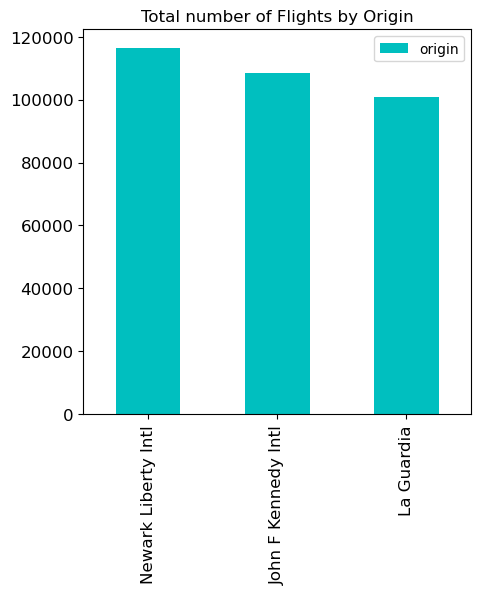

In [ ]:
origin_count = data["origin"].value_counts()
print("The total number of flights from the three NYC airports scheduled were:")
print(origin_count)
print()
draw_barplot(X=origin_count,Kind="bar",Color="c",Title="Total number of Flights by Origin")
print("")

In [ ]:
dep_delay_stats = data["dep_delay"].groupby(data["origin"]).apply(calc_stats).unstack()
print("The min, max, mean & total count of departure delays by origin is: ")
dep_delay_stats

The min, max, mean & total count of departure delays by origin is: 


min     max     count       mean
origin                                                
John F Kennedy Intl -43.0  1301.0  108488.0  12.018970
La Guardia          -33.0   911.0  100776.0  10.295358
Newark Liberty Intl -25.0  1126.0  116460.0  15.003280

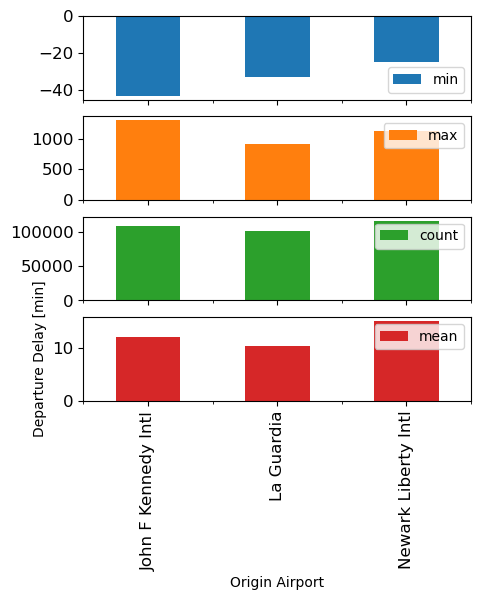

In [ ]:
draw_barplot_subplot(X=dep_delay_stats, Kind="bar",Subtitle=["","","",""],YLabel="Departure Delay [min]", XLabel="Origin Airport", Title="")

In [ ]:
arr_delay_stats = data["arr_delay"].groupby(data["origin"]).apply(calc_stats).unstack()
print("The min, max, mean & total count of arrival delays by origin is: ")
arr_delay_stats

The min, max, mean & total count of arrival delays by origin is: 


min     max     count      mean
origin                                               
John F Kennedy Intl -79.0  1272.0  108488.0  5.529736
La Guardia          -68.0   915.0  100776.0  5.790823
Newark Liberty Intl -86.0  1109.0  116460.0  9.090065

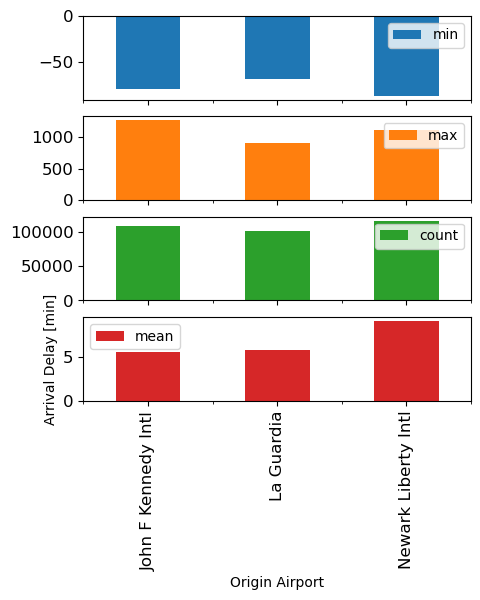

In [ ]:
draw_barplot_subplot(X=arr_delay_stats, Kind="bar",Subtitle=["","","",""],YLabel="Arrival Delay [min]", XLabel="Origin Airport", Title="")

The average departure delay by Origin was:


/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/4198977365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_dep_delay=data.groupby(by="origin").mean().reset_index().sort_values(by="year", ascending=False)


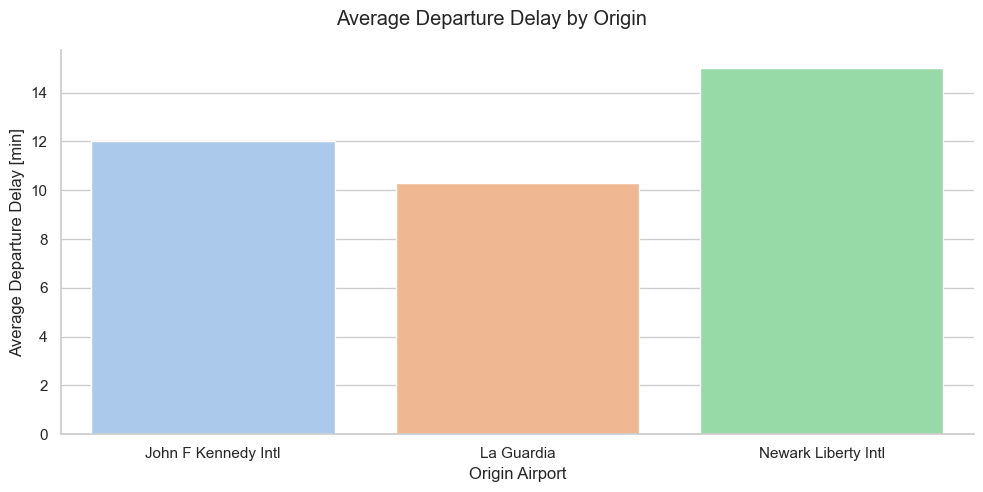

In [ ]:
avg_dep_delay=data.groupby(by="origin").mean().reset_index().sort_values(by="year", ascending=False)
data[["origin","dep_delay"]]

print("The average departure delay by Origin was:")

draw_catplot(Style="whitegrid",X="origin",Y="dep_delay",XLabels="Origin Airport",
             YLabels="Average Departure Delay [min]", Dataframe=avg_dep_delay,
             Suptitle="Average Departure Delay by Origin", Kind="bar", Palette="pastel", Col=None, Row=None
            )

The average arrival delay by Origin was:


/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/2250224980.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_arr_delay=data.groupby(by="origin").mean().reset_index().sort_values(by="year", ascending=False)


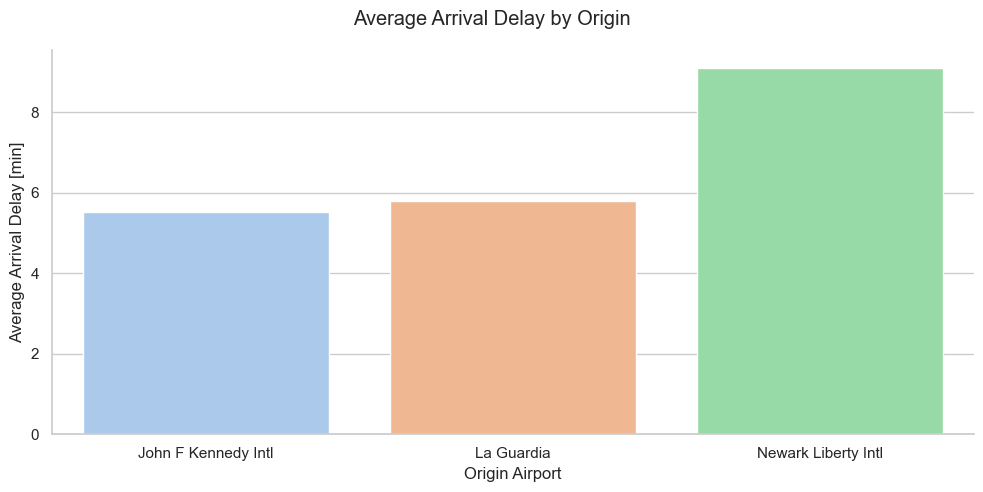

In [ ]:
avg_arr_delay=data.groupby(by="origin").mean().reset_index().sort_values(by="year", ascending=False)
data[["origin","arr_delay"]]

print("The average arrival delay by Origin was:")

draw_catplot(Style="whitegrid",X="origin",Y="arr_delay",XLabels="Origin Airport",
             YLabels="Average Arrival Delay [min]", Dataframe=avg_arr_delay,
             Suptitle="Average Arrival Delay by Origin", Kind="bar", Palette="pastel", Col=None, Row=None
            )

In [ ]:
ontime_dep = (data[data["dep_delay"]==0].groupby("origin").count()).loc[:,"year":"year"]
print("On time Departures grouped by Origin:")
ontime_dep.head()

On time Departures grouped by Origin:


year
origin                   
John F Kennedy Intl  6180
La Guardia           4662
Newark Liberty Intl  5537

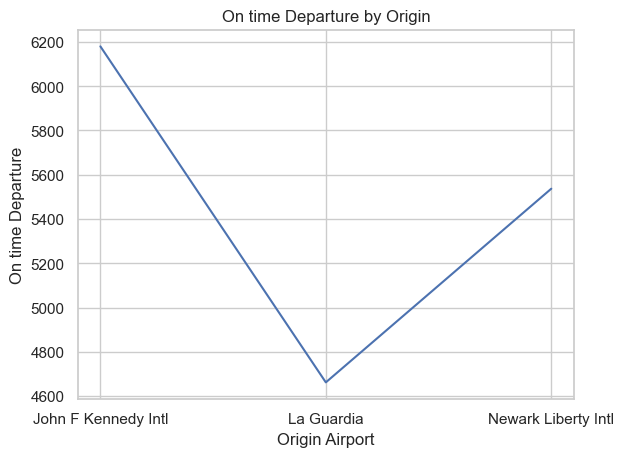

In [ ]:
draw_lineplot(ontime_dep, "On time Departure by Origin", "Origin Airport", "On time Departure")

In [ ]:
ontime_arr = (data[data["arr_delay"]==0].groupby("origin").count()).loc[:,"year":"year"]
print("On time Arrivals grouped by Origin:")
ontime_arr.head()

On time Arrivals grouped by Origin:


year
origin                   
John F Kennedy Intl  1795
La Guardia           1679
Newark Liberty Intl  1901

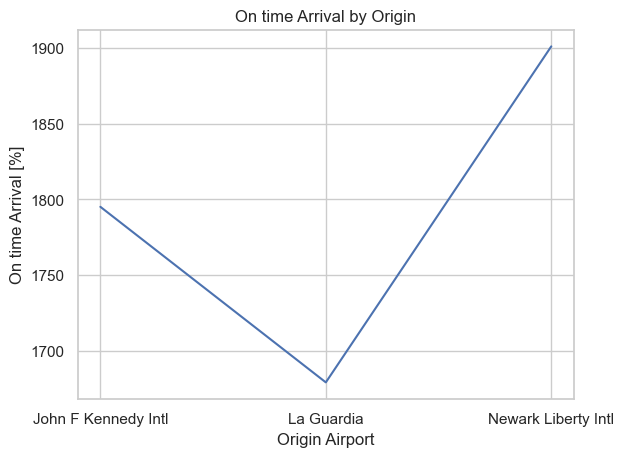

In [ ]:
draw_lineplot(ontime_arr, "On time Arrival by Origin", "Origin Airport", "On time Arrival [%]")

The minimum departure delays by origin:


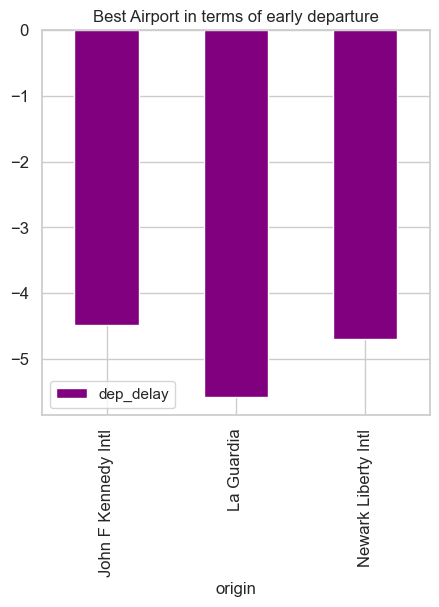

In [ ]:
airport_info = pd.DataFrame(data,columns=["day","month","dep_delay","arr_delay","origin"])
airport_origin_dep = airport_info[airport_info["dep_delay"]<0]
best_airport_dep = airport_origin_dep.sort_values(["dep_delay"]).groupby(["origin"]).agg({"dep_delay":"mean"})

print("The minimum departure delays by origin:")
draw_barplot(best_airport_dep,"bar","Purple","Best Airport in terms of early departure")

The minimum arrival delays by origin:


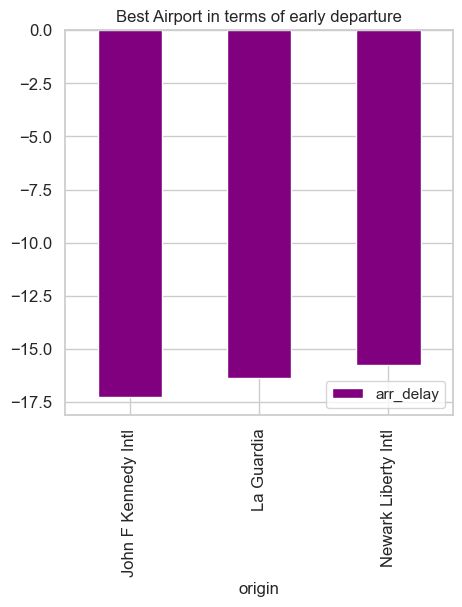

In [ ]:
airport_origin_arr = airport_info[airport_info["arr_delay"]<0]
best_airport_arr = airport_origin_arr.sort_values(["arr_delay"]).groupby(["origin"]).agg({"arr_delay":"mean"})

print("The minimum arrival delays by origin:")
draw_barplot(best_airport_arr,"bar","Purple","Best Airport in terms of early departure")

### 1.6.2 Analysis of Airlines

In [ ]:
dep_Delay_al=data.groupby(["airline"], as_index=False).agg({"dep_delay": "mean"})
dep_Delay_al_max=dep_Delay_al["dep_delay"].max()
dep_Delay_al_info=dep_Delay_al[dep_Delay_al["dep_delay"]==dep_Delay_al_max]


arr_Delay_al=data.groupby(["airline"], as_index=False).agg({"arr_delay": "mean"})
arr_Delay_al_max=arr_Delay_al["arr_delay"].max()
arr_Delay_al_info=arr_Delay_al[arr_Delay_al["arr_delay"]==arr_Delay_al_max]

print("The airline having the highest average departure delay:" '\n' ,dep_Delay_al_info)
print("The airline having the highest average arrival delay:" '\n' ,arr_Delay_al_info)

The airline having the highest average departure delay:
                   airline  dep_delay
7  Frontier Airlines Inc.  20.243004
The airline having the highest average arrival delay:
                   airline  arr_delay
7  Frontier Airlines Inc.  21.961708


In [ ]:
airline_count = data["airline"].value_counts()
print("Total number of flights by airline:")
print(airline_count)

Total number of flights by airline:
United Air Lines Inc.          57465
JetBlue Airways                53686
ExpressJet Airlines Inc.       50855
Delta Air Lines Inc.           47455
American Airlines Inc.         31815
Envoy Air                      24935
US Airways Inc.                19760
Endeavor Air Inc.              17225
Southwest Airlines Co.         11986
Virgin America                  5088
AirTran Airways Corporation     3162
Alaska Airlines Inc.             704
Frontier Airlines Inc.           679
Mesa Airlines Inc.               541
Hawaiian Airlines Inc.           339
SkyWest Airlines Inc.             29
Name: airline, dtype: int64


In [ ]:
airline_count = data["airline"].value_counts(normalize=True).round(4) *100
print("Share of flights by airline:")
print(airline_count)

Share of flights by airline:
United Air Lines Inc.          17.64
JetBlue Airways                16.48
ExpressJet Airlines Inc.       15.61
Delta Air Lines Inc.           14.57
American Airlines Inc.          9.77
Envoy Air                       7.66
US Airways Inc.                 6.07
Endeavor Air Inc.               5.29
Southwest Airlines Co.          3.68
Virgin America                  1.56
AirTran Airways Corporation     0.97
Alaska Airlines Inc.            0.22
Frontier Airlines Inc.          0.21
Mesa Airlines Inc.              0.17
Hawaiian Airlines Inc.          0.10
SkyWest Airlines Inc.           0.01
Name: airline, dtype: float64


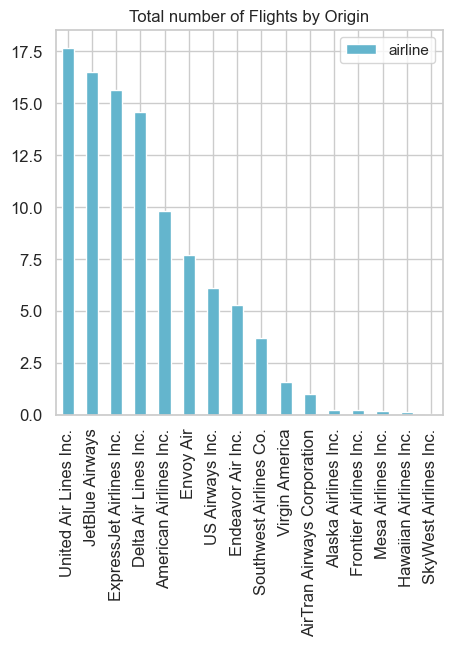

In [ ]:
draw_barplot(X=airline_count,Kind="bar",Color="c",Title="Total number of Flights by Origin")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


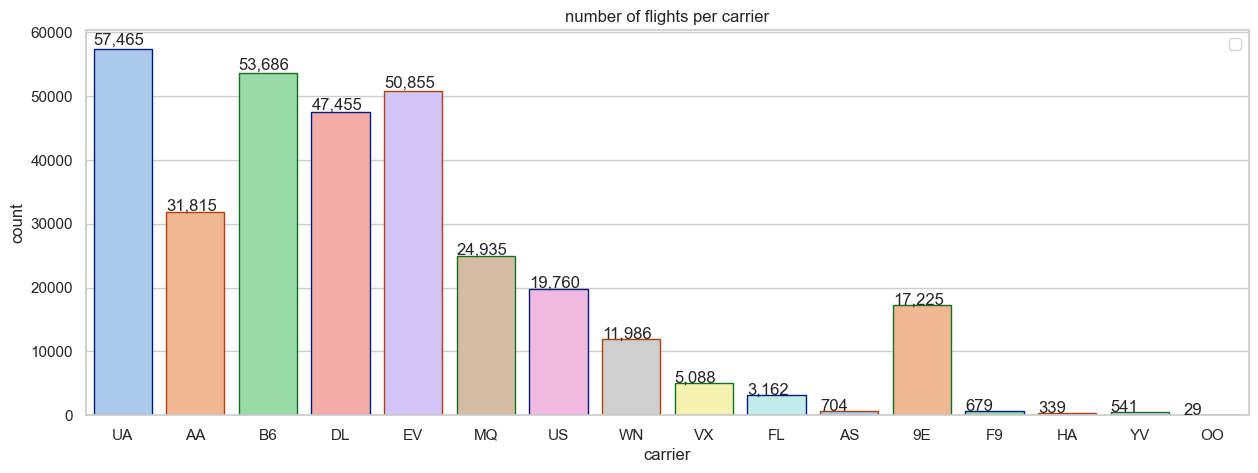

In [ ]:
draw_CountPlot("carrier",data,"number of flights per carrier","pastel")

In [ ]:
data.groupby("carrier").agg(np.size)                 
top_dep_delay = data.groupby("carrier").agg({"dep_delay" :[np.size,np.mean]})
                                                
print("Average departure delay grouped by airline:")                                                               
top_dep_delay.sort_values([("dep_delay", "mean")], ascending=False).head()

Average departure delay grouped by airline:


dep_delay           
             size       mean
carrier                     
F9            679  20.243004
EV          50855  19.837676
YV            541  19.038817
FL           3162  18.585073
WN          11986  17.665109

In [ ]:
data.groupby("carrier").agg(np.size)                 
top_arr_delay = data.groupby("carrier").agg({"arr_delay" :[np.size,np.mean]})
                                                
print("Average arrival delay grouped by airline:")                                                                                                                              
top_arr_delay.sort_values([("arr_delay", "mean")], ascending=False).head()

Average arrival delay grouped by airline:


arr_delay           
             size       mean
carrier                     
F9            679  21.961708
FL           3162  20.112271
EV          50855  15.781536
YV            541  15.741220
OO             29  11.931034

In [ ]:
dep_delay_al = data["dep_delay"].groupby(data["airline"]).apply(calc_stats).unstack()

print("Major statistical information of the departure delay by airline:")
dep_delay_al

Major statistical information of the departure delay by airline:


min     max    count       mean
airline                                                      
AirTran Airways Corporation -22.0   602.0   3162.0  18.585073
Alaska Airlines Inc.        -21.0   225.0    704.0   5.846591
American Airlines Inc.      -24.0  1014.0  31815.0   8.582681
Delta Air Lines Inc.        -33.0   960.0  47455.0   9.229249
Endeavor Air Inc.           -24.0   747.0  17225.0  16.447025
Envoy Air                   -26.0  1137.0  24935.0  10.452697
ExpressJet Airlines Inc.    -32.0   548.0  50855.0  19.837676
Frontier Airlines Inc.      -27.0   853.0    679.0  20.243004
Hawaiian Airlines Inc.      -16.0  1301.0    339.0   4.967552
JetBlue Airways             -43.0   502.0  53686.0  12.952055
Mesa Airlines Inc.          -16.0   387.0    541.0  19.038817
SkyWest Airlines Inc.       -14.0   154.0     29.0  12.586207
Southwest Airlines Co.      -13.0   471.0  11986.0  17.665109
US Airways Inc.             -19.0   500.0  19760.0   3.746103
United Air Lines Inc.       -20.0   483.0  57465.0  12.003828
Virgin America              -20.0   653.0   5088.0  12.780857

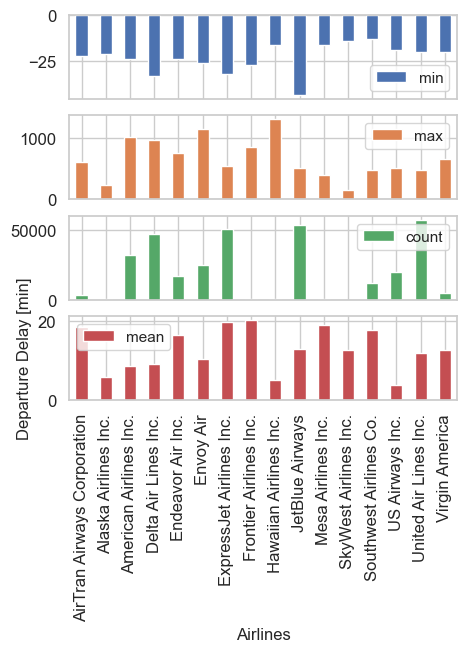

In [ ]:
draw_barplot_subplot(X=dep_delay_al, Kind="bar",Subtitle=["","","",""],YLabel="Departure Delay [min]", XLabel="Airlines", Title="")

In [ ]:
arr_delay_al = data["arr_delay"].groupby(data["airline"]).apply(calc_stats).unstack()
print("Major statistical information of the arrival delay by airline:")
arr_delay_al

Major statistical information of the arrival delay by airline:


min     max    count       mean
airline                                                      
AirTran Airways Corporation -44.0   572.0   3162.0  20.112271
Alaska Airlines Inc.        -74.0   198.0    704.0  -9.963068
American Airlines Inc.      -75.0  1007.0  31815.0   0.363162
Delta Air Lines Inc.        -71.0   931.0  47455.0   1.643136
Endeavor Air Inc.           -68.0   744.0  17225.0   7.404354
Envoy Air                   -53.0  1127.0  24935.0  10.776820
ExpressJet Airlines Inc.    -62.0   577.0  50855.0  15.781536
Frontier Airlines Inc.      -47.0   834.0    679.0  21.961708
Hawaiian Airlines Inc.      -70.0  1272.0    339.0  -6.970501
JetBlue Airways             -71.0   497.0  53686.0   9.416533
Mesa Airlines Inc.          -46.0   381.0    541.0  15.741220
SkyWest Airlines Inc.       -26.0   157.0     29.0  11.931034
Southwest Airlines Co.      -58.0   453.0  11986.0   9.619723
US Airways Inc.             -70.0   492.0  19760.0   2.136538
United Air Lines Inc.       -75.0   455.0  57465.0   3.545706
Virgin America              -86.0   676.0   5088.0   1.759827

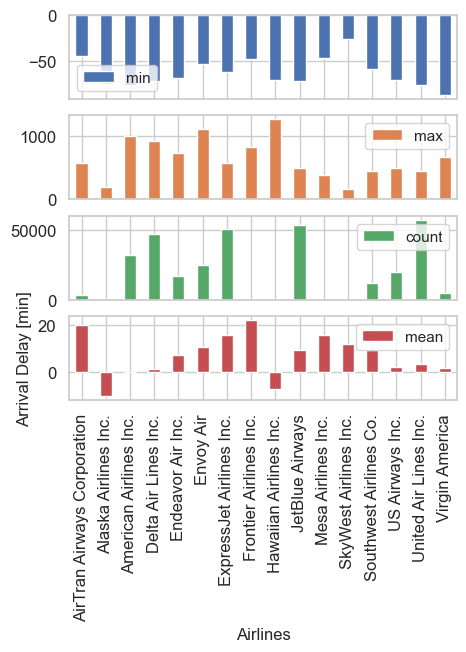

In [ ]:
draw_barplot_subplot(X=arr_delay_al, Kind="bar",Subtitle=["","","",""],YLabel="Arrival Delay [min]", XLabel="Airlines", Title="")

In [ ]:
"""
For this question the data will get a Status, depending on their high of delay.
It seperates the departure/arrival delay to 0 if the delay is <=0 and to 1 if the delay is >0.
"""

data.loc[data['dep_delay'] <= 0, 'departure delay status'] = 0
data.loc[data['dep_delay'] > 0, 'departure delay status'] = 1

data.loc[data['arr_delay'] <= 0, 'arrival delay status'] = 0
data.loc[data['arr_delay'] > 0, 'arrival delay status'] = 1

/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/1438758585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['dep_delay'] <= 0, 'departure delay status'] = 0
/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/1438758585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['arr_delay'] <= 0, 'arrival delay status'] = 0


Comparison of the departure delay and catch up, grouped by airline:


<Figure size 1500x500 with 0 Axes>

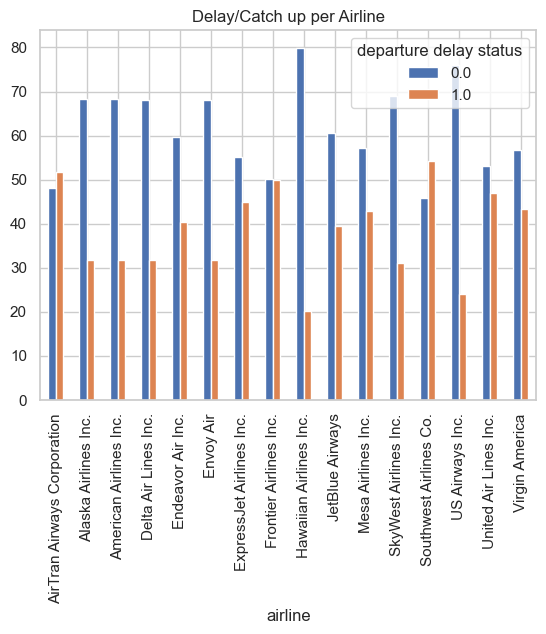

In [ ]:
print("Comparison of the departure delay and catch up, grouped by airline:")
draw_crosstab_norm(data["airline"], data["departure delay status"], "index", "Delay/Catch up per Airline","bar",False,)

Comparison of the arrival delay and catch up, grouped by airline:


<Figure size 1500x500 with 0 Axes>

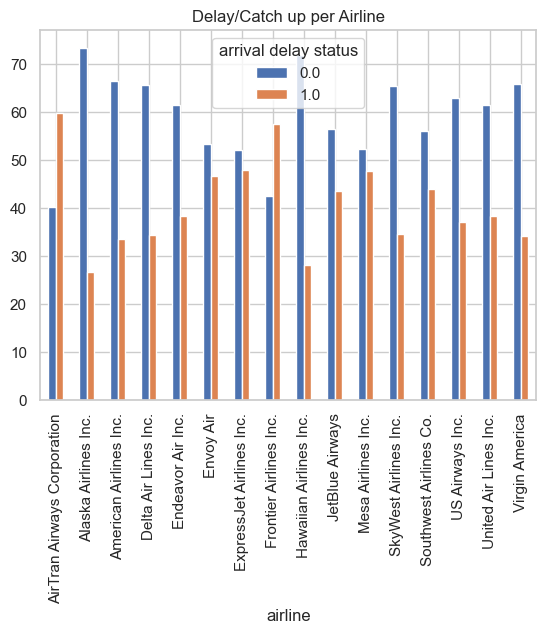

In [ ]:
print("Comparison of the arrival delay and catch up, grouped by airline:")
draw_crosstab_norm(data["airline"], data["arrival delay status"], "index", "Delay/Catch up per Airline","bar",False)

<Figure size 1500x500 with 0 Axes>

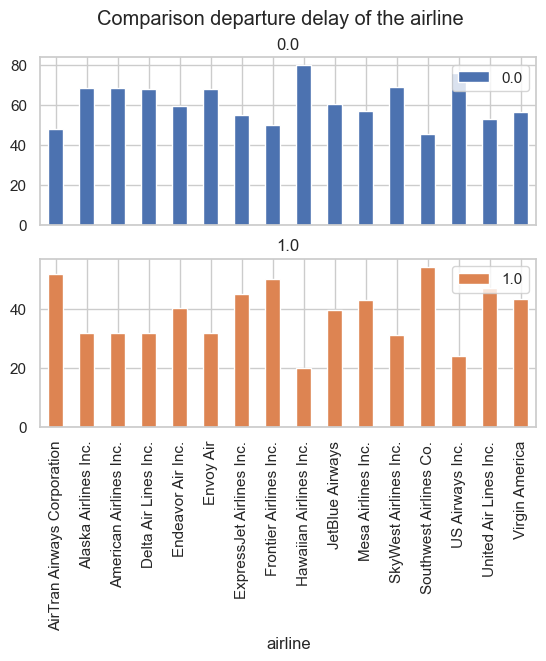

In [ ]:
draw_crosstab_norm(data["airline"],data["departure delay status"],"index","Comparison departure delay of the airline","bar",True)

Comparison of the departure delay and catch up, grouped by airline:


<Figure size 1500x1000 with 0 Axes>

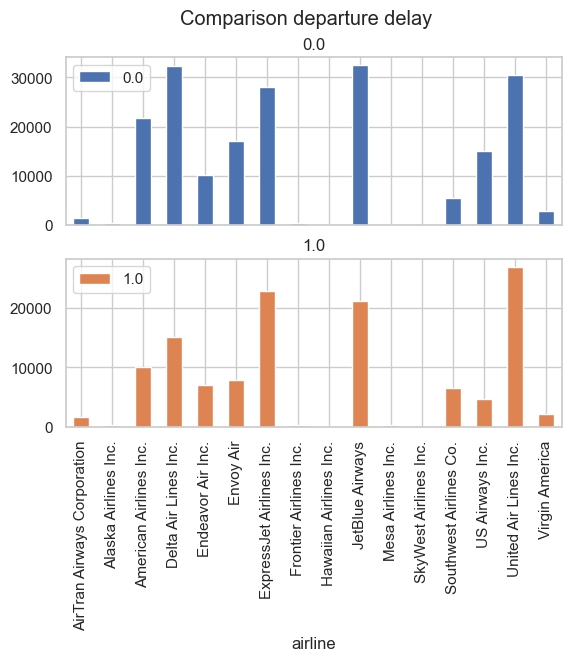

In [ ]:
print("Comparison of the departure delay and catch up, grouped by airline:")
draw_crosstab(data["airline"],data["departure delay status"],"Comparison departure delay",True,"bar",(15,10))

<Figure size 1500x500 with 0 Axes>

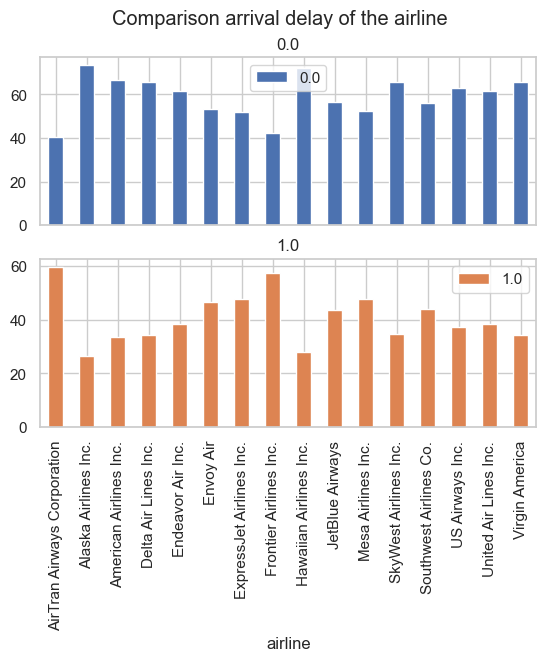

In [ ]:
draw_crosstab_norm(data["airline"],data["arrival delay status"],"index","Comparison arrival delay of the airline","bar",True)

Comparison of the arrival delay and catch up, grouped by airline:


<Figure size 1500x1000 with 0 Axes>

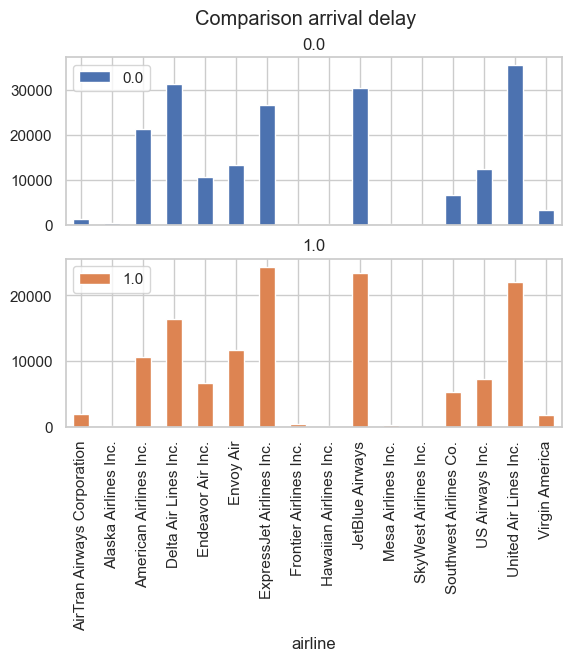

In [ ]:
print("Comparison of the arrival delay and catch up, grouped by airline:")
draw_crosstab(data["airline"],data["arrival delay status"],"Comparison arrival delay",True,"bar",(15,10))

The average departure and arrival delay by airline:


/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/2162972971.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=X1, y=Y, data=Dataframe, color=Color1, ci=None)
/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/2162972971.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=X2, y=Y, data=Dataframe, color=Color2, hatch = "///", alpha=0.2, ci=None)


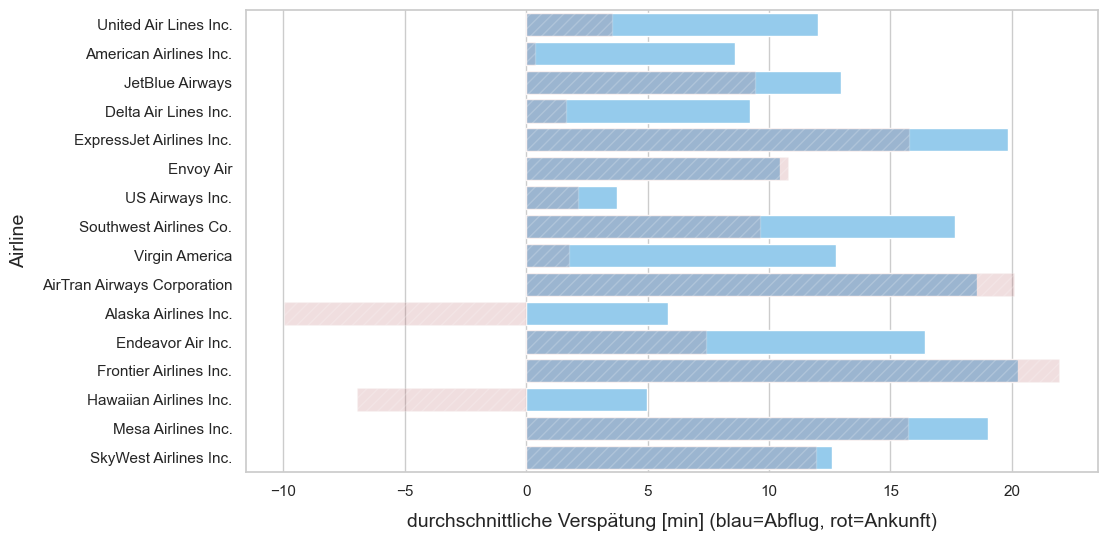

In [ ]:
print("The average departure and arrival delay by airline:")
draw_ol_barplot("dep_delay","arr_delay","airline",data,"lightskyblue","r","durchschnittliche Verspätung [min] (blau=Abflug, rot=Ankunft)","Airline")

### 1.6.3 Analysis of Date

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The total number of flights per month:


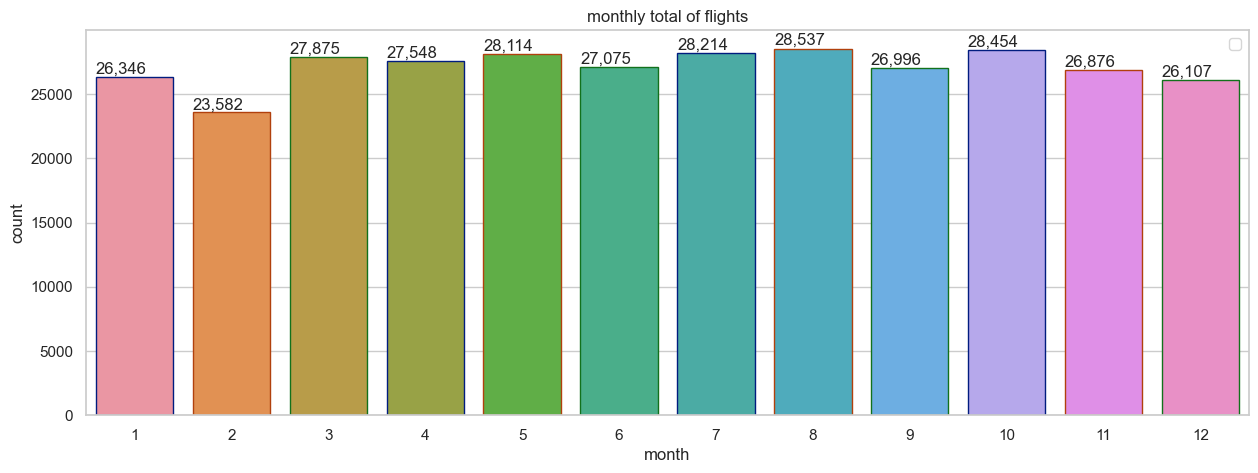

In [ ]:
print("The total number of flights per month:")
draw_CountPlot("month",data,"monthly total of flights",None)

In [ ]:
print("The average departure delay per month and airline:")
dep_delay_month = data.groupby(["carrier","month"], axis=0, as_index=True).agg({"dep_delay":"mean"})
dep_delay_month["dep_delay"] = np.round(dep_delay_month["dep_delay"],0)
dep_delay_month.head(15)

The average departure delay per month and airline:


dep_delay
carrier month           
9E      1           17.0
        2           16.0
        3           13.0
        4           13.0
        5           23.0
        6           28.0
        7           30.0
        8           17.0
        9            8.0
        10           9.0
        11           7.0
        12          20.0
AA      1            7.0
        2            8.0
        3            9.0

In [ ]:
# The average departure delay per month
monthly_dep_delay = data.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_dep_delay['dep_delay']=np.round(monthly_dep_delay['dep_delay'],0)

The average departure delay per month:


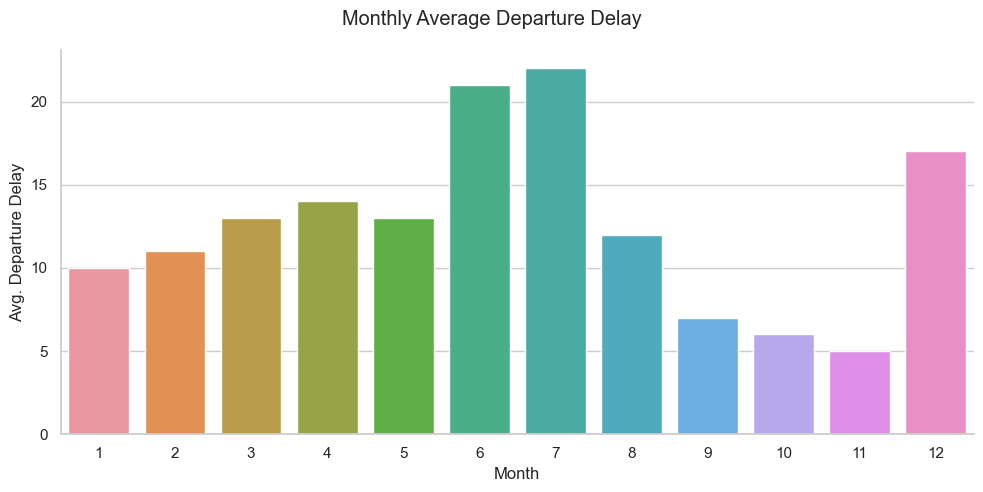

In [ ]:
print("The average departure delay per month:")
draw_catplot(None,"month","dep_delay",monthly_dep_delay,"Monthly Average Departure Delay","Month","Avg. Departure Delay","bar",None,None,None)

The average and total departure and arrival delay per month:


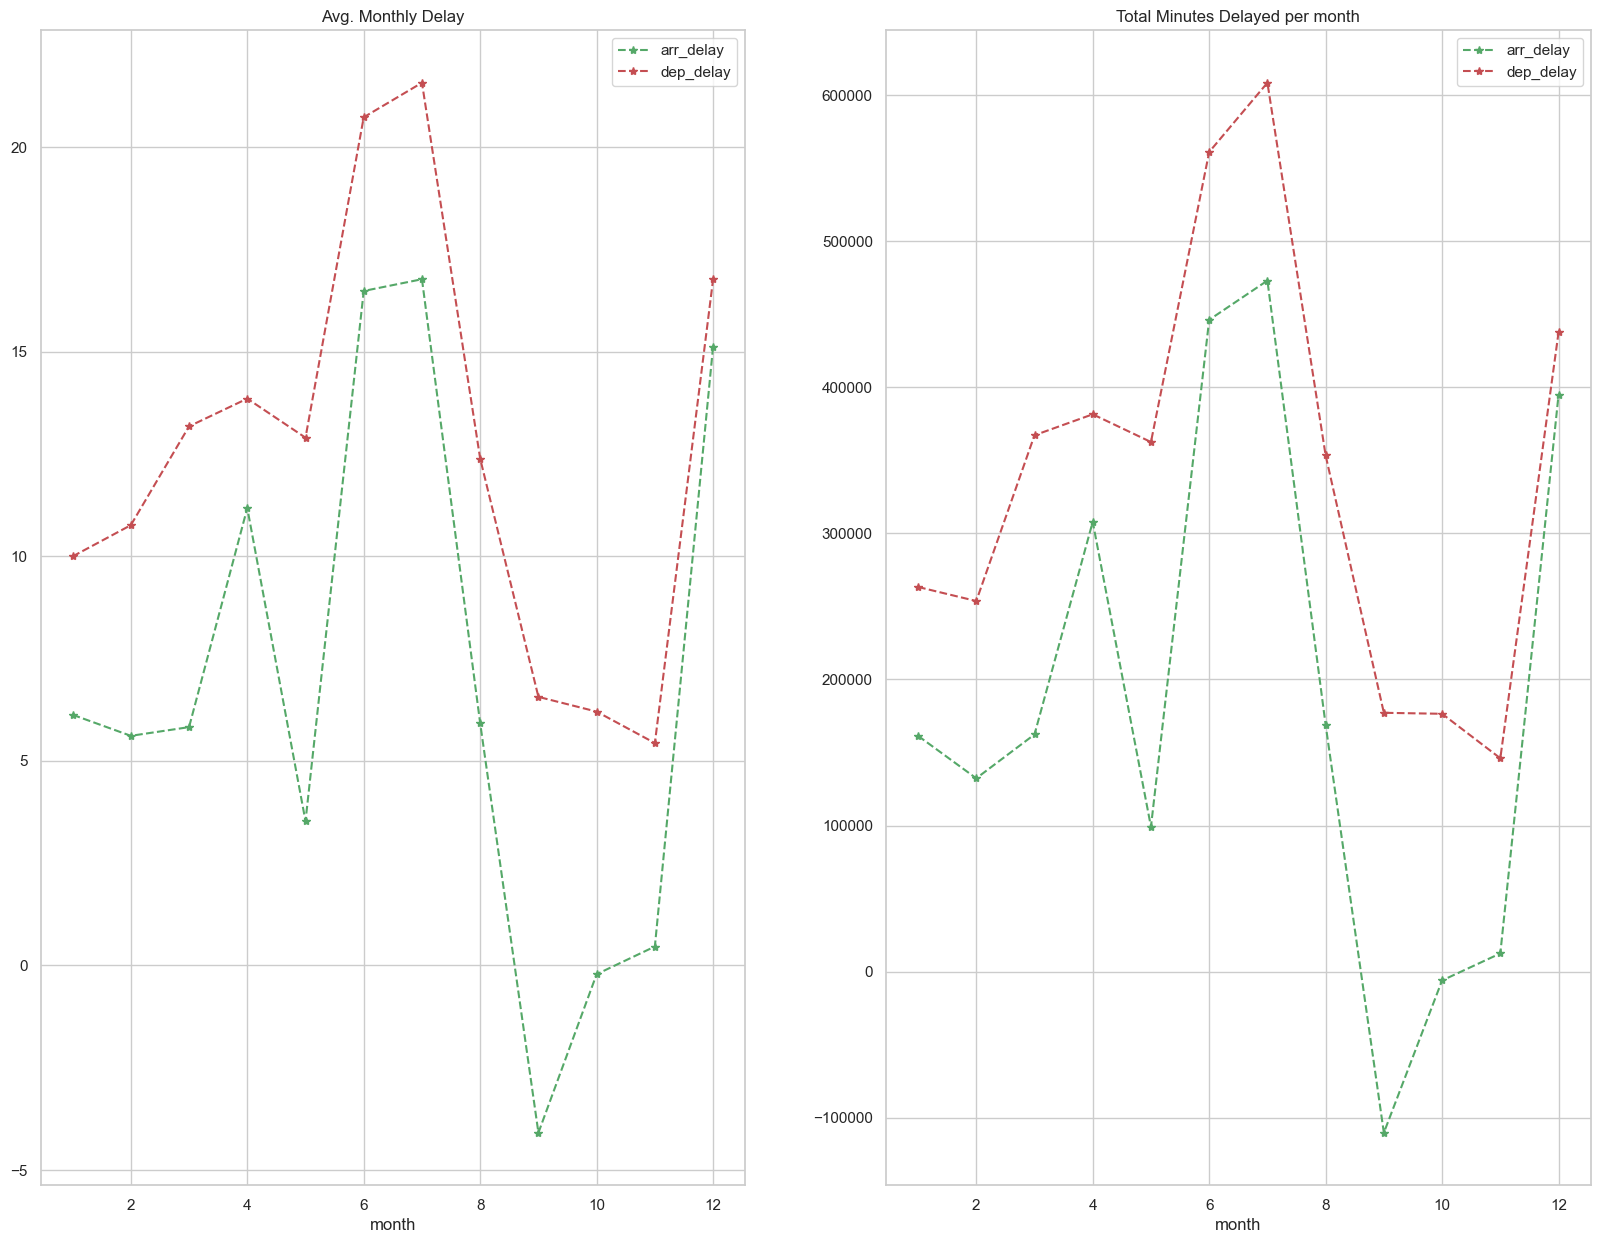

In [ ]:
print("The average and total departure and arrival delay per month:")
draw_mean_n_sum(data,"month","arr_delay","dep_delay","month","*","*","dashed","g"+"r","Avg. Monthly Delay","Total Minutes Delayed per month",(20,15))

### 1.6.4 Analysis of Temperature

In [ ]:
print("The average temperature per month:")
monthly_temp = data.groupby(["month"], as_index=False).agg({"temp": "mean"})
monthly_temp.head(12)

The average temperature per month:


month       temp
0       1   2.490302
1       2   2.047795
2       3   5.080631
3       4  11.924728
4       5  17.624554
5       6  23.257411
6       7  27.568172
7       8  24.405663
8       9  20.617832
9      10  16.398900
10     11   7.837491
11     12   4.125495

The average monthly temperature per month:


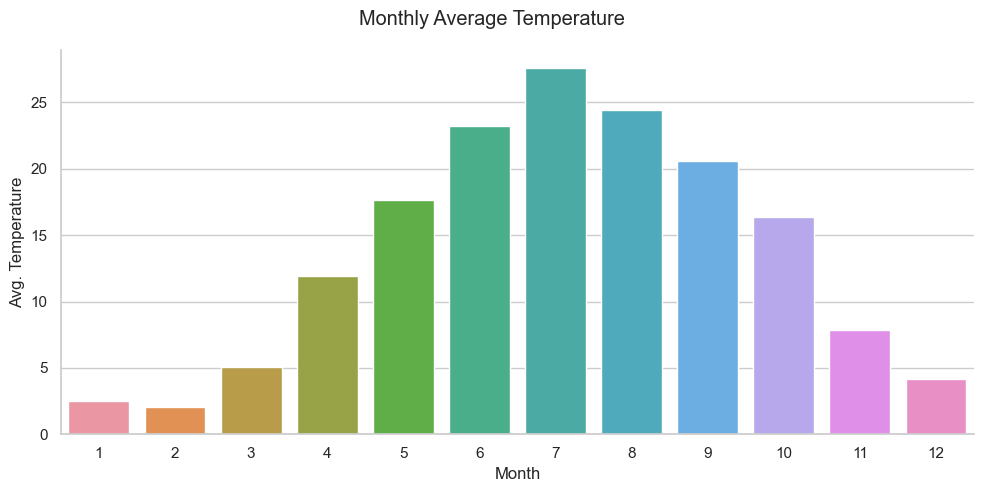

In [ ]:
print("The average monthly temperature per month:")
draw_catplot(None,"month","temp",monthly_temp,"Monthly Average Temperature","Month","Avg. Temperature","bar",None,None,None)

The average and total delay per temperature (temperature rounded to 10):


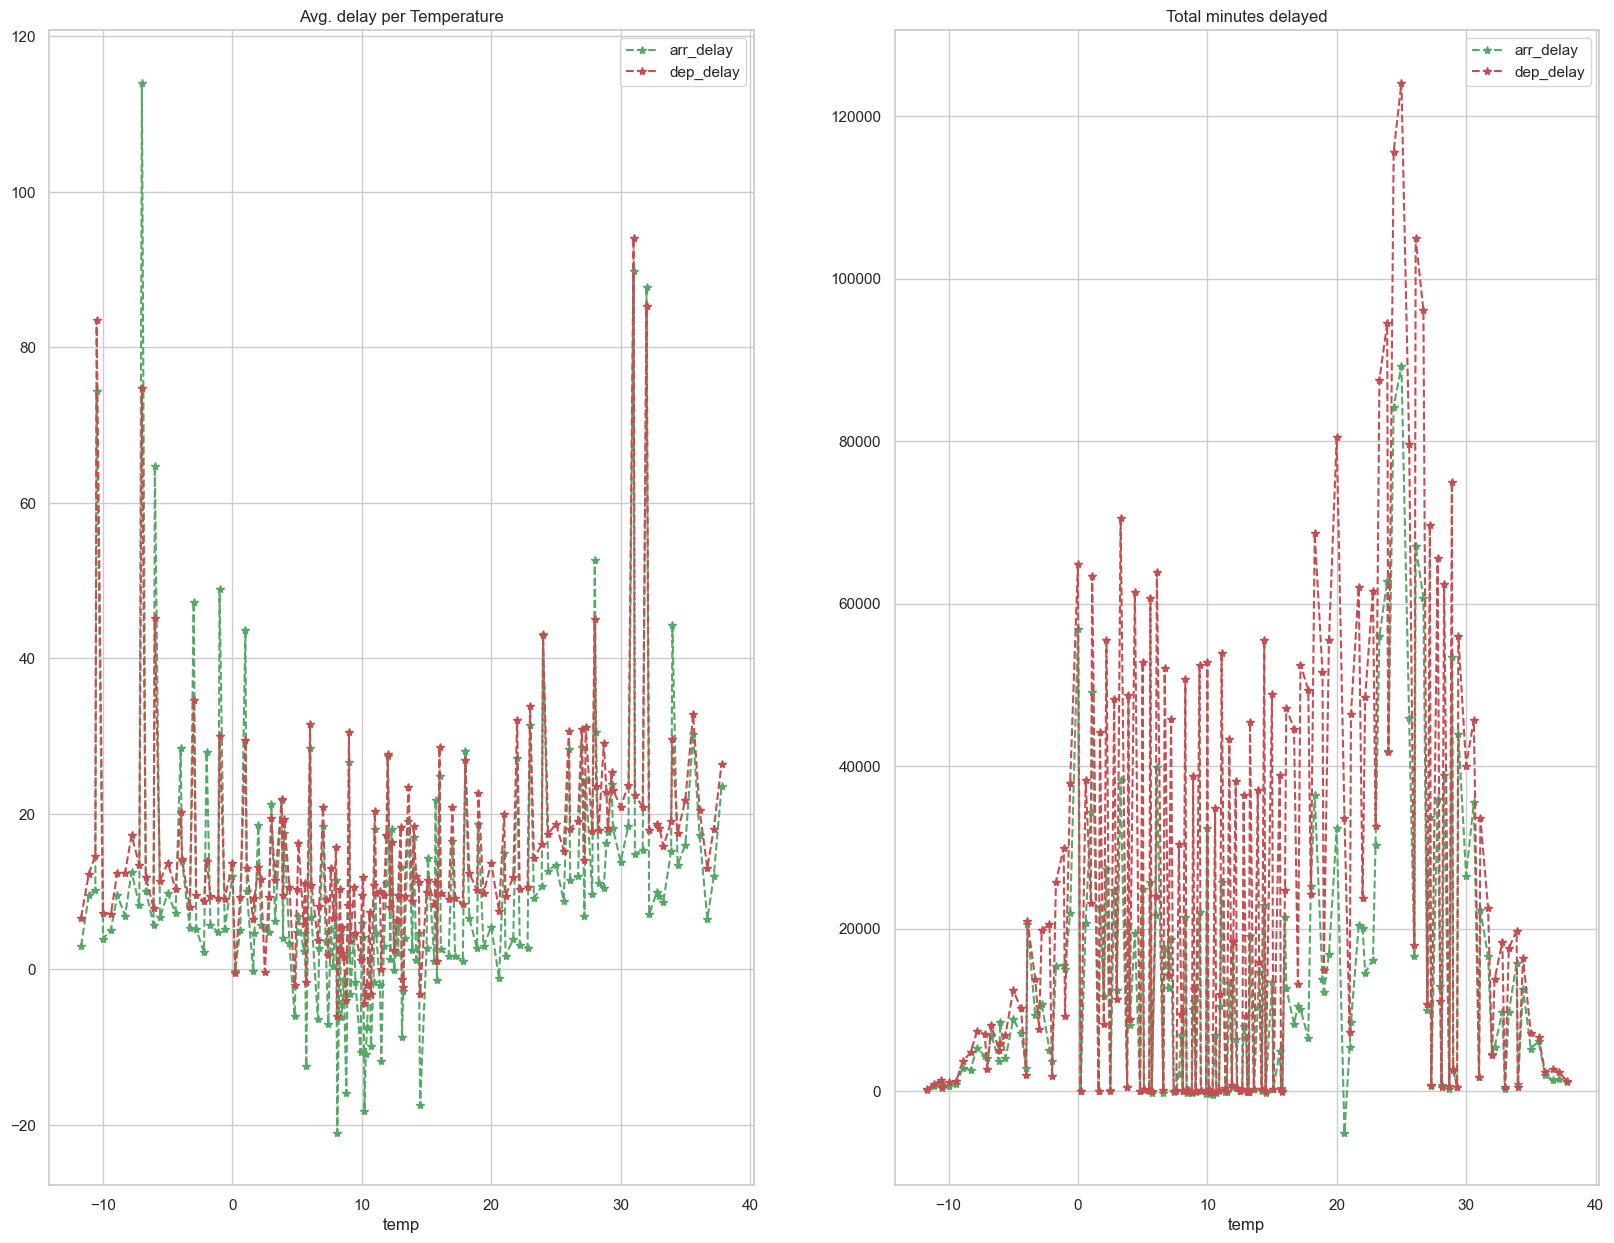

In [ ]:
print("The average and total delay per temperature (temperature rounded to 10):")
draw_mean_n_sum(data,"temp","arr_delay","dep_delay","temp","*","*","dashed","g"+"r","Avg. delay per Temperature","Total minutes delayed",(20,15))

In [ ]:
print("The total temperature per month:")
total_temp = data.groupby(["temp"], as_index=True).agg({"temp": "count"})
total_temp.head(12)



The total temperature per month:


temp
temp       
-11.7    32
-11.1    71
-10.6    97
-10.5     6
-10.0   155
-9.4    177
-8.9    295
-8.3    383
-7.8    426
-7.2    524
-7.0     36
-6.7    687

Scheduled flights per temperature:


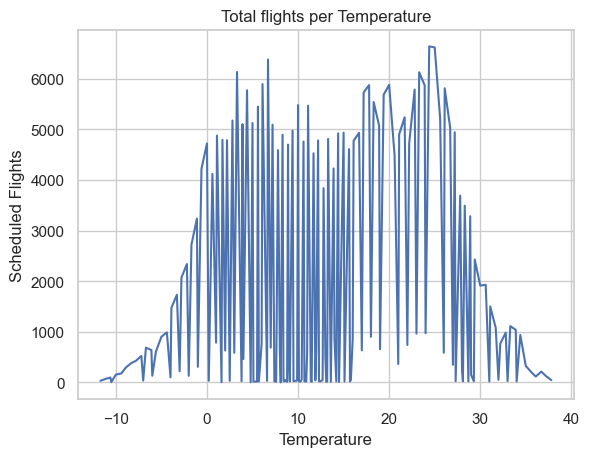

In [ ]:
print("Scheduled flights per temperature:")
draw_lineplot(total_temp, "Total flights per Temperature", "Temperature", "Scheduled Flights")

In [ ]:
print("The average departure delay per temperature:")
dep_delay_temp = data.groupby(["temp"], as_index=False).agg({"dep_delay": "mean"})
dep_delay_temp = round(dep_delay_temp/10)*10
dep_delay_temp = dep_delay_temp.groupby(["temp"], as_index=False).agg({"dep_delay": "mean"})
dep_delay_temp["dep_delay"] = np.round(dep_delay_temp["dep_delay"],0)
dep_delay_temp.head()

The average departure delay per temperature:


temp  dep_delay
0 -10.0       22.0
1  -0.0       12.0
2  10.0        9.0
3  20.0       15.0
4  30.0       28.0

The average departure delay per temperature:


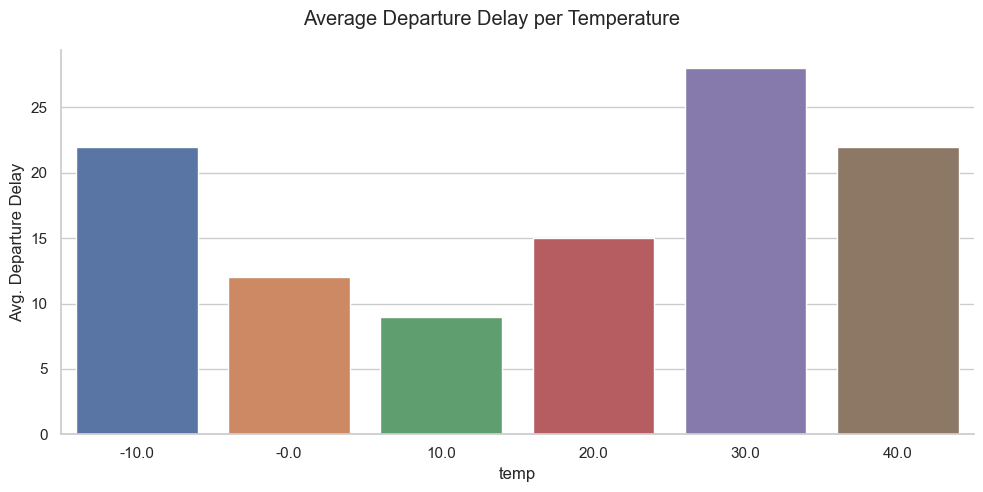

In [ ]:
print("The average departure delay per temperature:")
draw_catplot(None,"temp","dep_delay",dep_delay_temp,"Average Departure Delay per Temperature","temp","Avg. Departure Delay","bar",None,None,None)

In [ ]:
print("The average arrival delay per temperature:")
arr_delay_temp = data.groupby(["temp"], as_index=False).agg({"arr_delay": "mean"})
arr_delay_temp = round(arr_delay_temp/10)*10
arr_delay_temp = arr_delay_temp.groupby(['temp'], as_index=False).agg({"arr_delay": "mean"})
arr_delay_temp["arr_delay"] = np.round(arr_delay_temp["arr_delay"],0)
arr_delay_temp.head()

The average arrival delay per temperature:


temp  arr_delay
0 -10.0       23.0
1  -0.0       12.0
2  10.0        2.0
3  20.0       10.0
4  30.0       23.0

The average arrival delay per temperature:


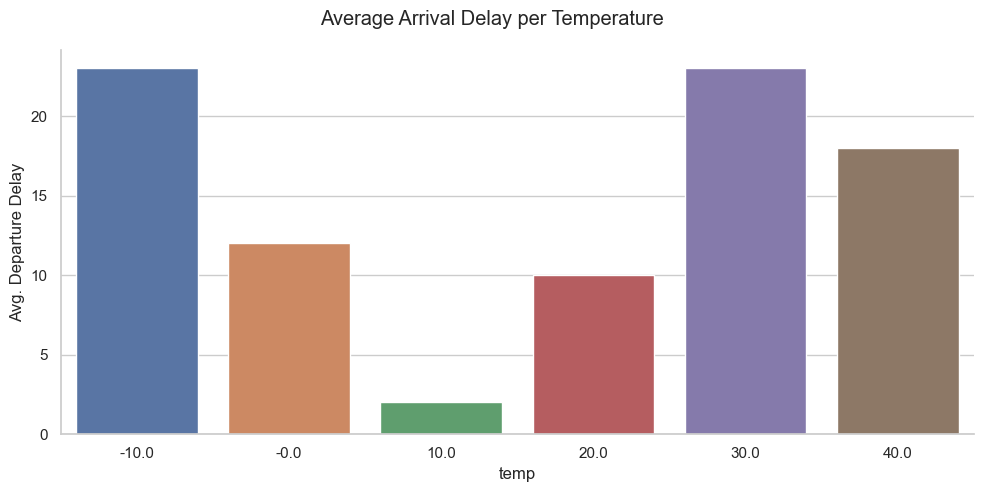

In [ ]:
print("The average arrival delay per temperature:")
draw_catplot(None,"temp","arr_delay",arr_delay_temp,"Average Arrival Delay per Temperature","temp","Avg. Departure Delay","bar",None,None,None)

### 1.6.5 Analysis of Wind Speed

The average and total departure and arrival delay per wind speed:


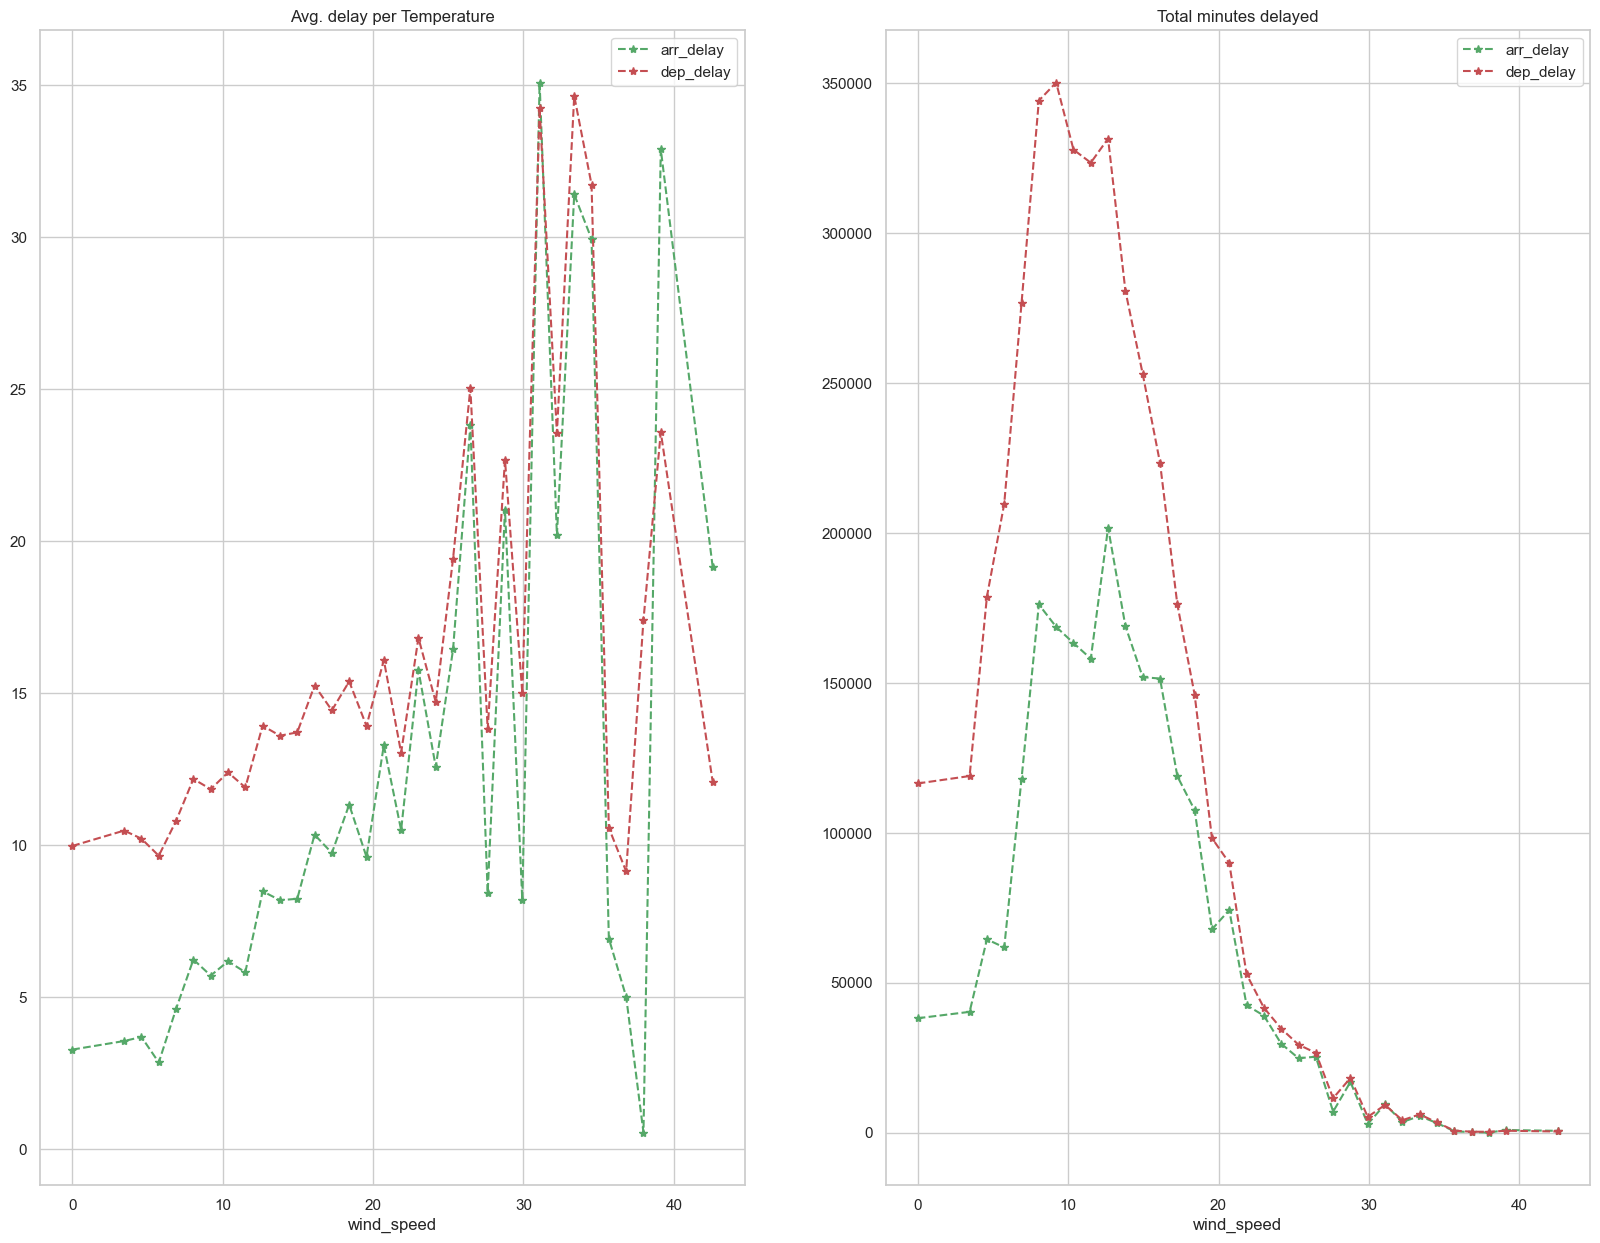

In [ ]:
print("The average and total departure and arrival delay per wind speed:")
draw_mean_n_sum(data,"wind_speed","arr_delay","dep_delay","wind_speed","*","*","dashed","g"+"r","Avg. delay per Temperature","Total minutes delayed",(20,15))

In [ ]:
dep_delay_ws = data.groupby(["wind_speed"], as_index=False).agg({"dep_delay": "mean"})
dep_delay_ws = round(dep_delay_ws/10)*10
dep_delay_ws = dep_delay_ws.groupby(["wind_speed"], as_index=False).agg({"dep_delay": "mean"})
dep_delay_ws["dep_delay"] = np.round(dep_delay_ws["dep_delay"],0)
print("Average departure delay per wind speed (wind speed is roundet to 10):")
dep_delay_ws.head()

Average departure delay per wind speed (wind speed is roundet to 10):


wind_speed  dep_delay
0         0.0       10.0
1        10.0       10.0
2        20.0       15.0
3        30.0       22.0
4        40.0       14.0

Average departure delay per wind speed:


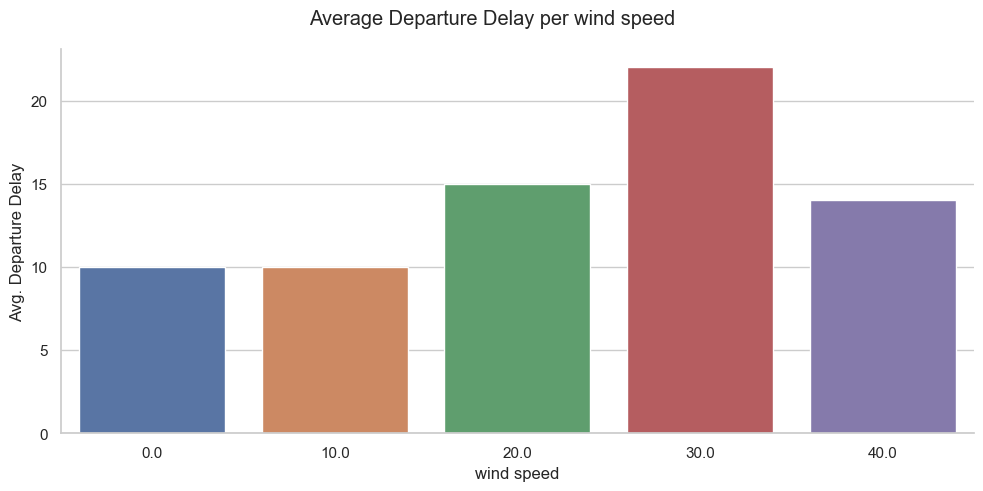

In [ ]:
print("Average departure delay per wind speed:")
draw_catplot(None,"wind_speed","dep_delay",dep_delay_ws,"Average Departure Delay per wind speed","wind speed","Avg. Departure Delay","bar",None,None,None)

In [ ]:
arr_delay_ws = data.groupby(["wind_speed"], as_index=False).agg({"arr_delay": "mean"})
arr_delay_ws = round(arr_delay_ws/10)*10
arr_delay_ws = arr_delay_ws.groupby(["wind_speed"], as_index=False).agg({"arr_delay": "mean"})
arr_delay_ws["arr_delay"] = np.round(arr_delay_temp["arr_delay"],0)
print("Average arrival delay per wind speed (wind speed is rounded to 10):")
arr_delay_ws.head()

Average arrival delay per wind speed (wind speed is rounded to 10):


wind_speed  arr_delay
0         0.0       23.0
1        10.0       12.0
2        20.0        2.0
3        30.0       10.0
4        40.0       23.0

Average arrival delay per wind speed:


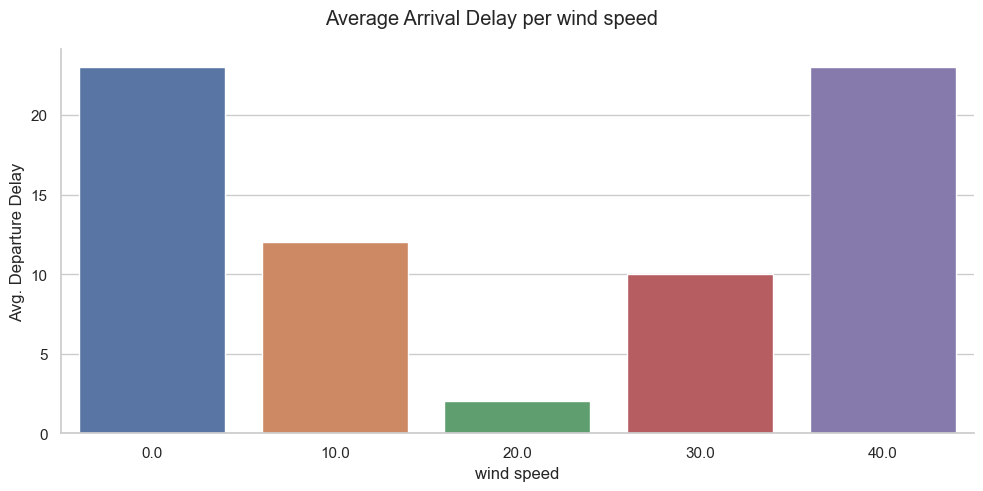

In [ ]:
print("Average arrival delay per wind speed:")
draw_catplot(None,"wind_speed","arr_delay",arr_delay_ws,"Average Arrival Delay per wind speed","wind speed","Avg. Departure Delay","bar",None,None,None)

### 1.6.6 Analysis Airline & Date

In [ ]:
"""
A new table with just relevant columns is created:
"""

carrier=data.drop(["year","day","hour","air_time","distance","origin","airline",
                         "manufacturer","model","engines","engine","wind_dir","wind_speed",
                                 "pressure","visib","departure delay status", "arrival delay status"], axis=1)
carrier.head()

month  dep_delay  arr_delay carrier  temp
0      1        2.0       11.0      UA   3.9
1      1        4.0       20.0      UA   4.4
2      1        2.0       33.0      AA   3.9
3      1       -1.0      -18.0      B6   3.9
4      1       -6.0      -25.0      DL   4.4

In [ ]:
dep_delay_carrier = pd.pivot_table(carrier,values='dep_delay', aggfunc='mean', index='carrier',columns='month')
dep_delay_carrier.head()

month           1          2          3          4          5          6   \
carrier                                                                     
9E       16.578378  16.387770  13.281457  13.437768  22.637744  28.313492   
AA        6.982327   8.251043   8.713399  11.748584   9.610990  14.497205   
AS        7.354839   0.722222   8.419355  11.316667   7.135593  13.083333   
B6        9.454566  13.733198  14.247681  15.158687   9.743160  20.221758   
DL        3.796383   5.499697   9.914605   8.110839   9.742801  18.734984   

month           7          8         9         10        11         12  
carrier                                                                 
9E       30.467862  16.638501  7.602180  9.300798  7.467177  19.842742  
AA       12.107052   7.146786  5.573822  2.969551  3.108884  12.062077  
AS        2.540984   2.688525 -4.516667  0.475410  3.076923  18.788462  
B6       24.819020  15.409843  6.579058  2.947064  3.447902  17.148664  
DL       20.443141   9.735871  5.413454  3.409358  2.844468  11.007136

The average amount of minutes delayed at departure per airline and month:


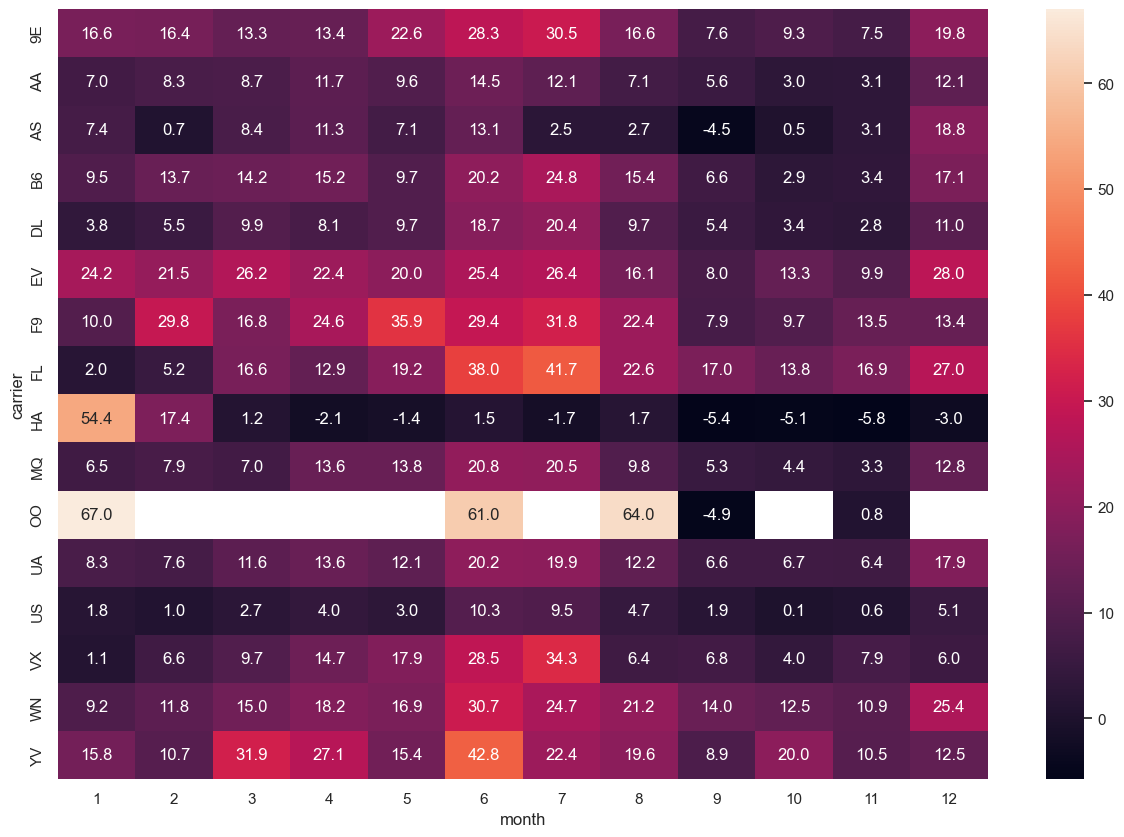

In [ ]:
print("The average amount of minutes delayed at departure per airline and month:")
draw_heatmap(dep_delay_carrier,(15,10))

In [ ]:
arr_delay_carrier = pd.pivot_table(carrier,values='arr_delay', aggfunc='mean', index='carrier',columns='month')
arr_delay_carrier.head()

month           1          2          3          4          5          6   \
carrier                                                                     
9E       10.207432   8.283371   2.031788   5.477110  10.415763  22.511905   
AA        0.961708   1.099666  -2.961665   8.257833  -4.674672   6.481178   
AS        8.967742 -12.740741  -4.838710   3.500000 -10.796610  -3.750000   
B6        4.690822  12.492265  10.868465  13.277815   2.722198  18.541319   
DL       -4.389148  -4.720170   1.424794   3.447769  -0.376815  13.261829   

month           7          8          9          10         11         12  
carrier                                                                    
9E       23.790732   4.930933  -7.143052  -1.394107   0.003187  14.811156  
AA        4.301627  -2.291071  -8.667705  -3.806907  -2.049921   8.052925  
AS      -15.327869 -18.393443 -34.900000 -26.180328 -10.807692   7.307692  
B6       23.443329  11.151521  -2.510424  -3.000693  -0.897454  19.495396  
DL       14.931051   0.790051  -4.521604  -6.332925  -2.760960   6.431448

The average amount of minutes delayed at arrival per airline and month:


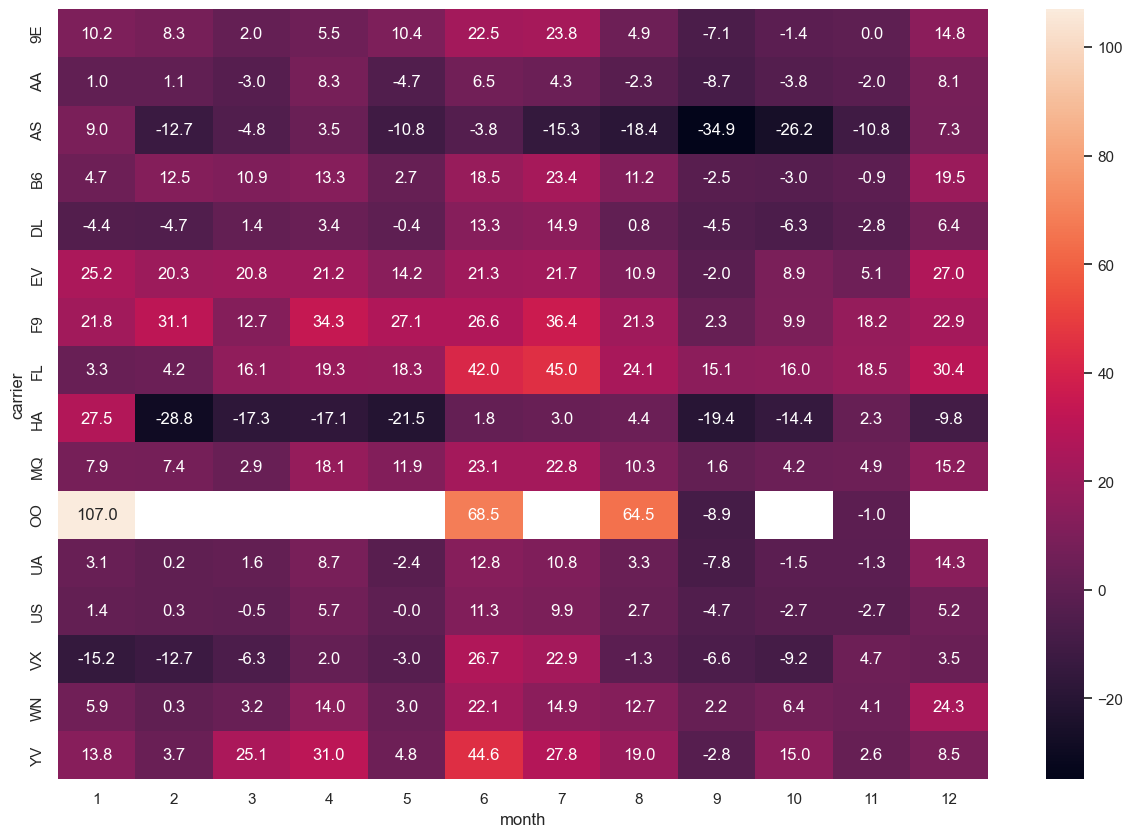

In [ ]:
print("The average amount of minutes delayed at arrival per airline and month:")
draw_heatmap(arr_delay_carrier,(15,10))

### 1.6.7 Analysis of Airline and Temperature

In [ ]:
data["temp_calc"] = (data["temp"]//10)*10


/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/428202812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["temp_calc"] = (data["temp"]//10)*10


Average departure delay per Temperature:


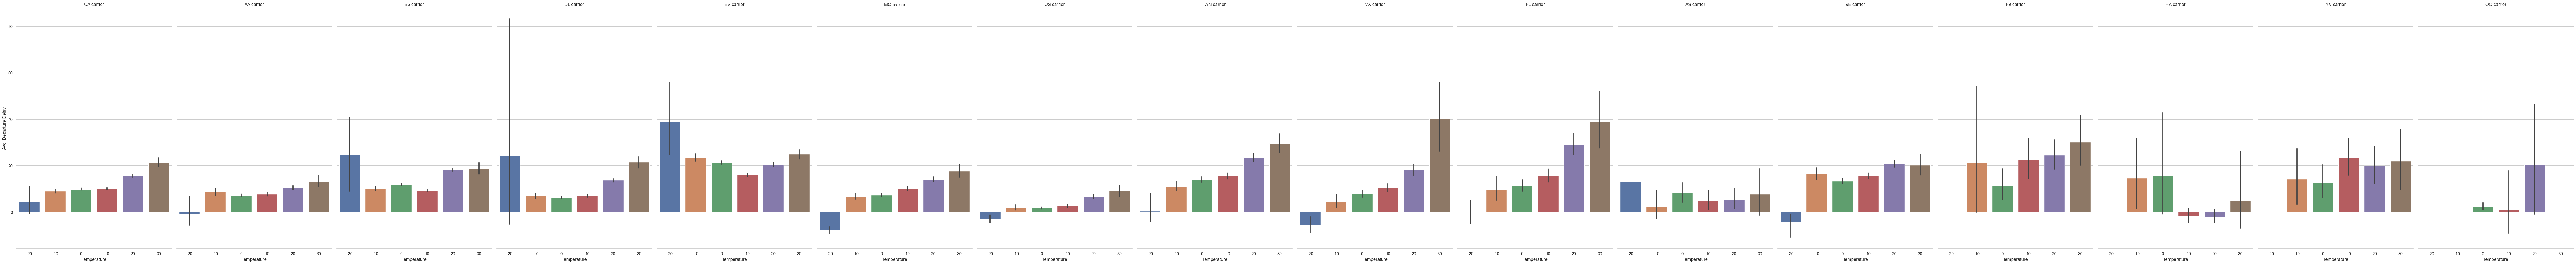

In [ ]:
print("Average departure delay per Temperature:")

ax = sns.catplot(
    data=data, x="temp_calc", y="dep_delay", col="carrier",
    kind="bar", height=10, aspect=.6,
)
ax.set_axis_labels("Temperature", "Avg. Departure Delay")
ax.set_xticklabels(["-20","-10","0","10","20","30"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)

Average arrival delay per Temperature:


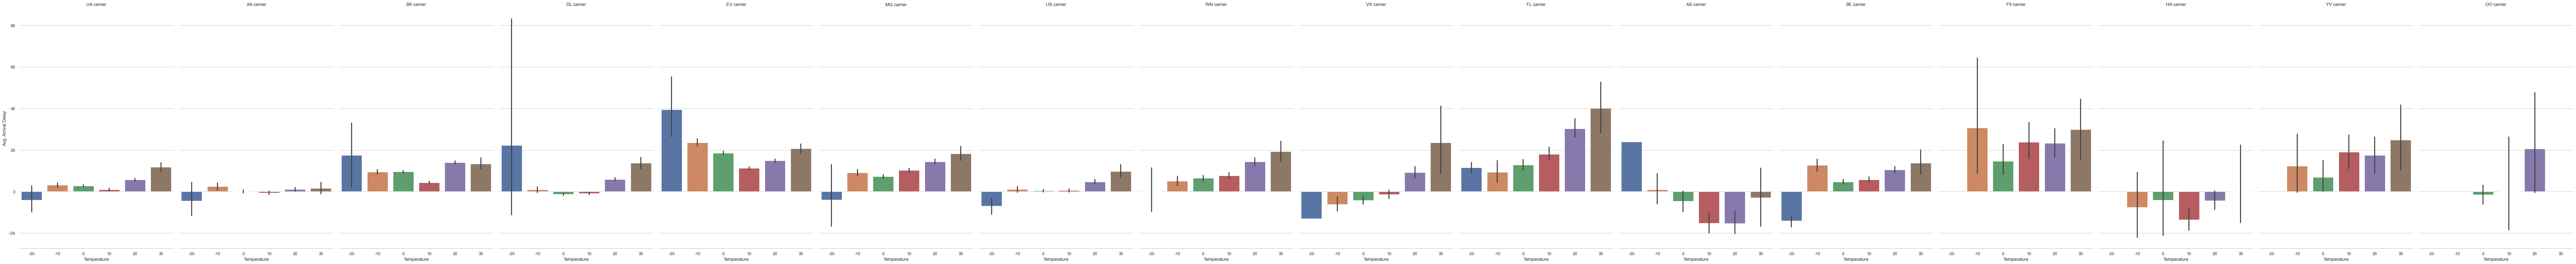

In [ ]:
print("Average arrival delay per Temperature:")

ax = sns.catplot(
    data=data, x="temp_calc", y="arr_delay", col="carrier",
    kind="bar", height=10, aspect=.6,
)
ax.set_axis_labels("Temperature", "Avg. Arrival Delay")
ax.set_xticklabels(["-20","-10","0","10","20","30"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)

## 1.7 Correlation

/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/87077235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr().round(2)


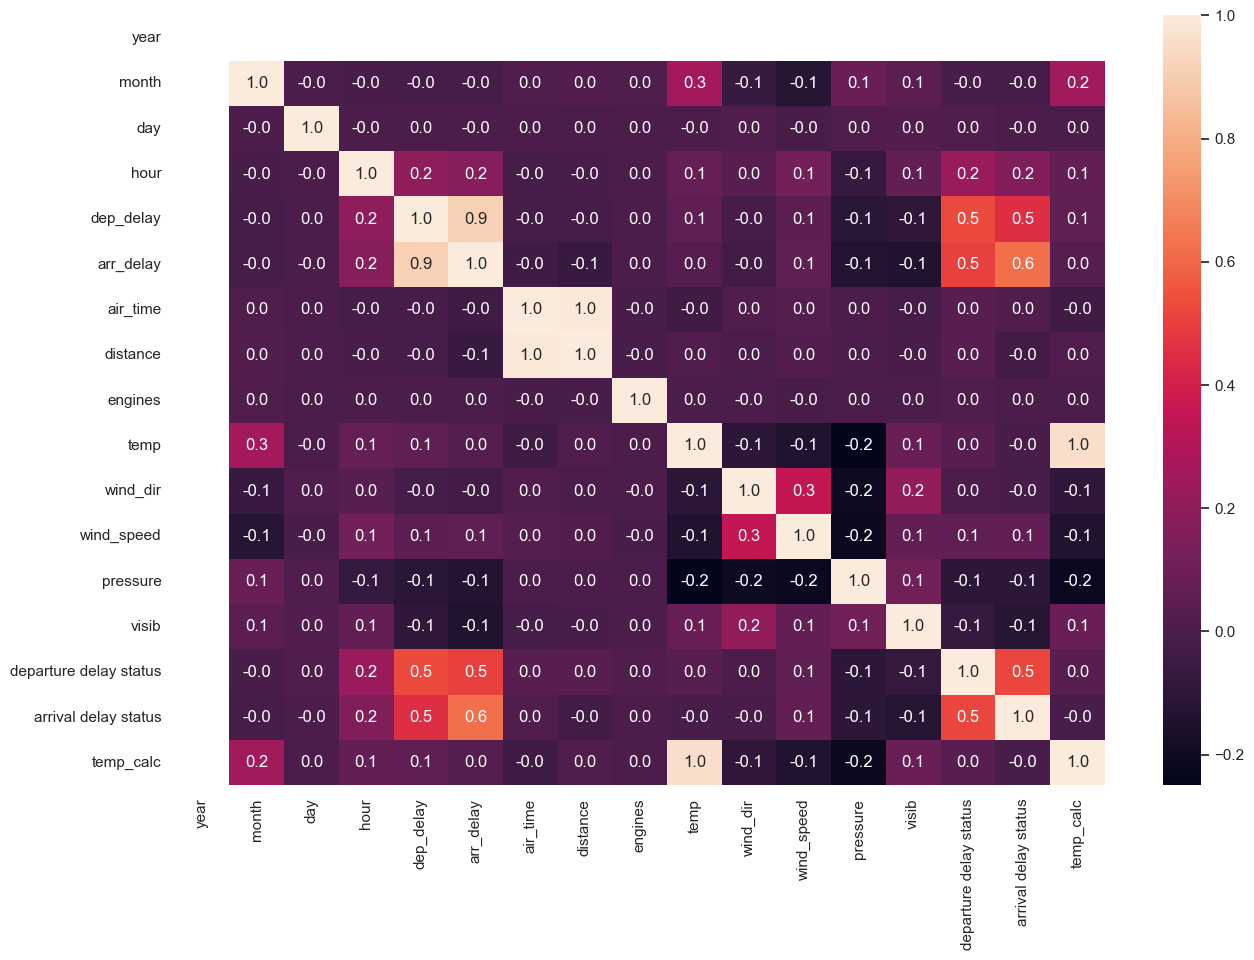

In [ ]:
correlation = data.corr().round(2)
draw_heatmap(correlation,(15,10))

## 1.8 Graphics for publications

In [ ]:
plt.close("all")

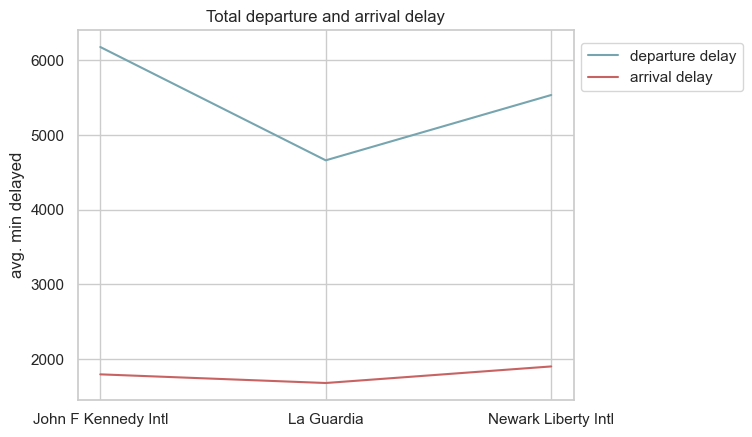

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(ontime_dep, label = "departure delay", color="#76a5af")
plt.plot(ontime_arr, label = "arrival delay", color="#c86363")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.title("Total departure and arrival delay")
plt.ylabel("avg. min delayed")
plt.show()

plt.savefig(os.path.join(STORAGE_PATH, "origin_dep_arr_delay.pdf"))

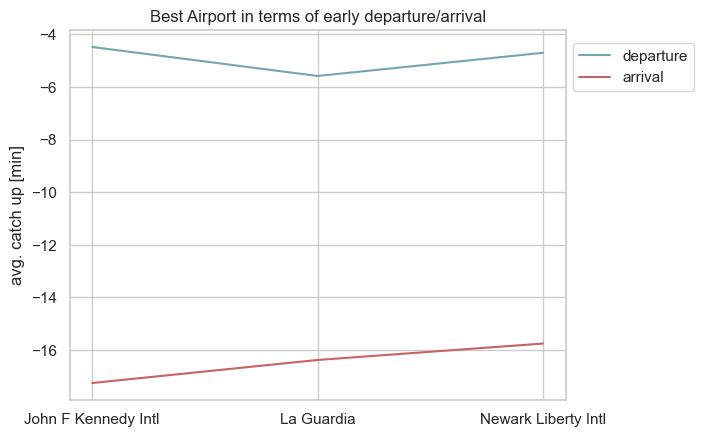

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(best_airport_dep, label = "departure", color="#76a5af")
plt.plot(best_airport_arr, label = "arrival", color="#c86363")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
plt.title("Best Airport in terms of early departure/arrival")
plt.ylabel("avg. catch up [min]")
plt.show()

plt.savefig(os.path.join(STORAGE_PATH, "best_airport.pdf"))

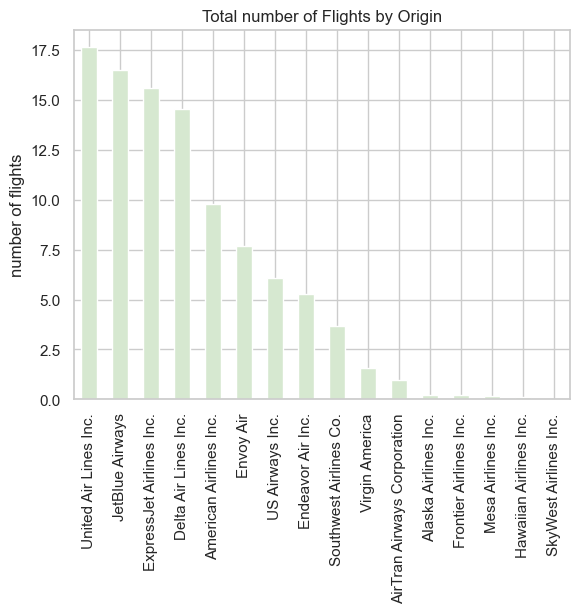

<Figure size 640x480 with 0 Axes>

In [ ]:
airline_count.plot(kind="bar", color="#d6e8d0")
plt.title("Total number of Flights by Origin")
plt.ylabel("number of flights")
plt.show()

plt.savefig(os.path.join(STORAGE_PATH, "origin_flights.pdf"))

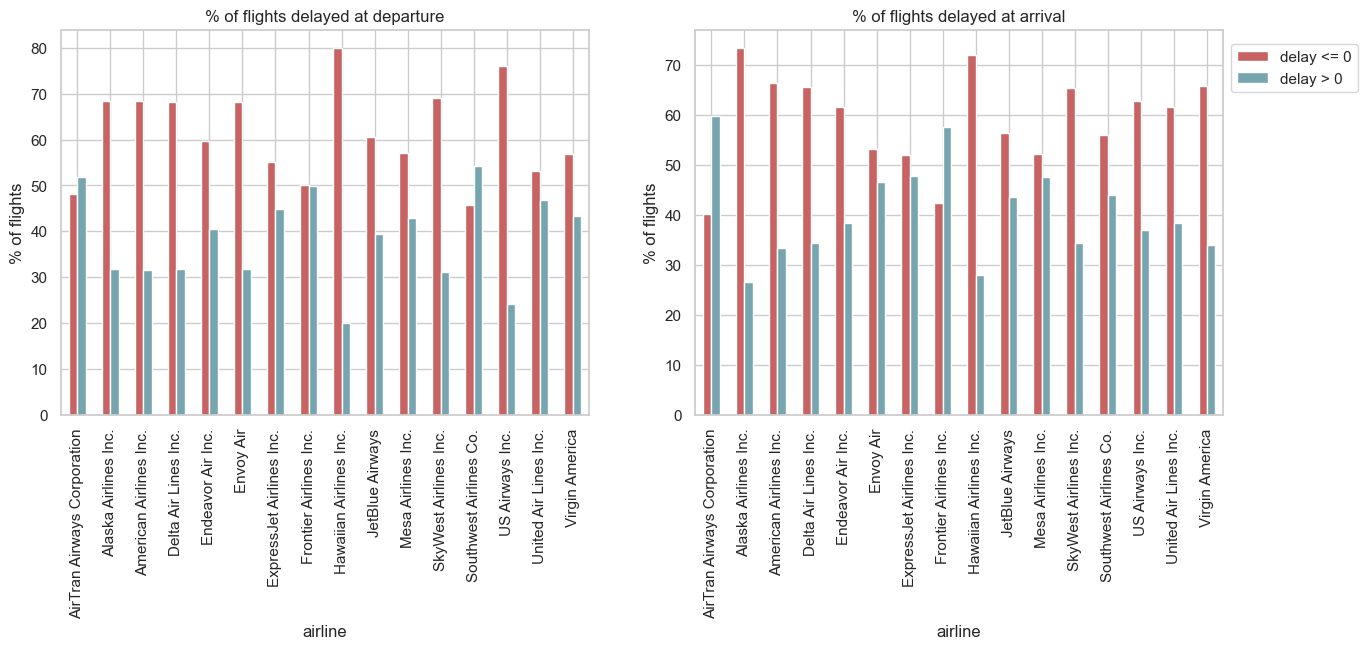

<Figure size 640x480 with 0 Axes>

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(15,5))

a = pd.crosstab(data["airline"], data["departure delay status"], normalize="index",).round(4) * 100
a.plot(kind="bar", color=["#c86363","#76a5af"], ax=ax[0])
ax[0].set_ylabel("% of flights")
ax[0].set_xlabel("airline")
ax[0].get_legend().remove()
ax[0].set_title("% of flights delayed at departure")

b = pd.crosstab(data["airline"], data["arrival delay status"], normalize="index").round(4) * 100
b.plot(kind="bar",  color=["#c86363","#76a5af"], ax=ax[1])
ax[1].set_xlabel("airline")
ax[1].set_ylabel("% of flights")
ax[1].set_title("% of flights delayed at arrival")
ax[1].legend(["delay <= 0","delay > 0"], loc='center left', bbox_to_anchor=(1, 0.9))

plt.show()

plt.savefig(os.path.join(STORAGE_PATH, "pct_delay.pdf"))

/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/3008217259.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="dep_delay", y="airline", data=data, color="#76a5af", ci=None)
/var/folders/bn/977njf7106lcwdnfvz4msz2w0000gn/T/ipykernel_23978/3008217259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="arr_delay", y="airline", data=data, color="#c86363", hatch = "///", alpha=0.6, ci=None)


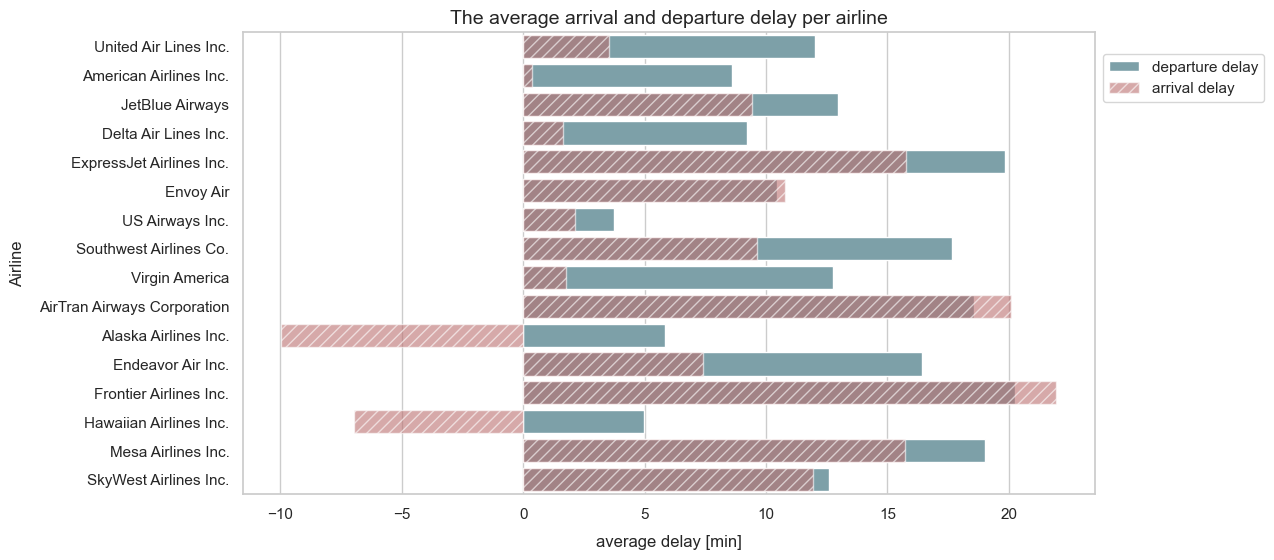

In [ ]:

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="dep_delay", y="airline", data=data, color="#76a5af", ci=None)
ax = sns.barplot(x="arr_delay", y="airline", data=data, color="#c86363", hatch = "///", alpha=0.6, ci=None)
plt.xlabel("average delay [min]", fontsize=12, labelpad=10)
plt.ylabel("Airline", fontsize=12, labelpad=10)
plt.title("The average arrival and departure delay per airline", fontsize=14)
plt.legend(["departure delay","arrival delay"], loc='center left', bbox_to_anchor=(1, 0.9))

plt.savefig(os.path.join(STORAGE_PATH, "avg_delay.pdf"))

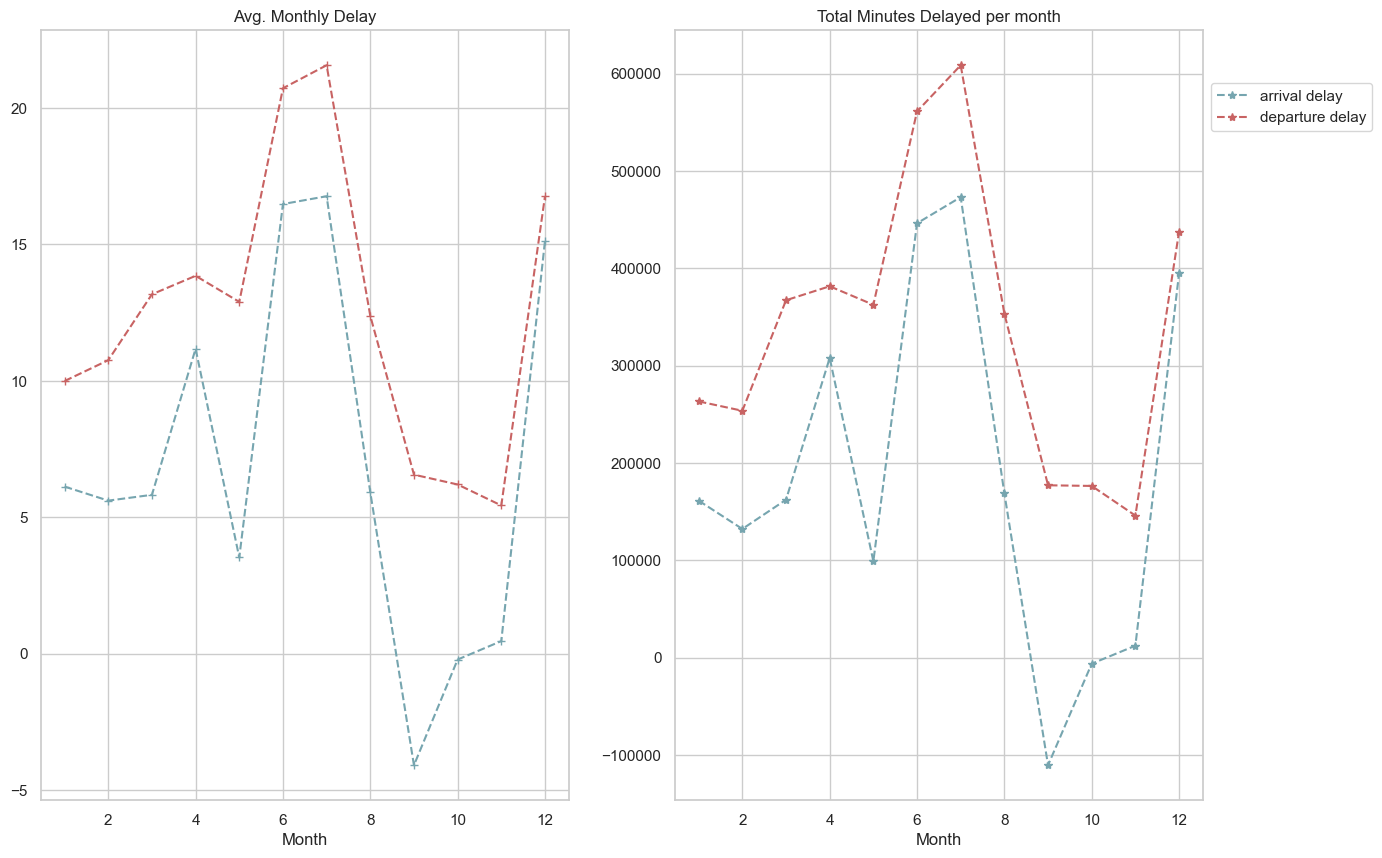

<Figure size 640x480 with 0 Axes>

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,10))
data[["month","arr_delay","dep_delay"]].groupby(["month"]).mean().plot(ax=ax[0],marker="+",linestyle="dashed",color=("#76a5af","#c86363"))
ax[0].set_title("Avg. Monthly Delay")
ax[0].get_legend().remove()
ax[0].set_xlabel("Month")
data[["month","arr_delay","dep_delay"]].groupby(["month"]).sum().plot(ax=ax[1],marker="*",linestyle="dashed",color=("#76a5af","#c86363"))
ax[1].set_title("Total Minutes Delayed per month")
ax[1].legend(["arrival delay","departure delay"], loc='center left', bbox_to_anchor=(1, 0.9))
ax[1].set_xlabel("Month")
plt.show()

plt.savefig(os.path.join(STORAGE_PATH, "month_delay.pdf"))

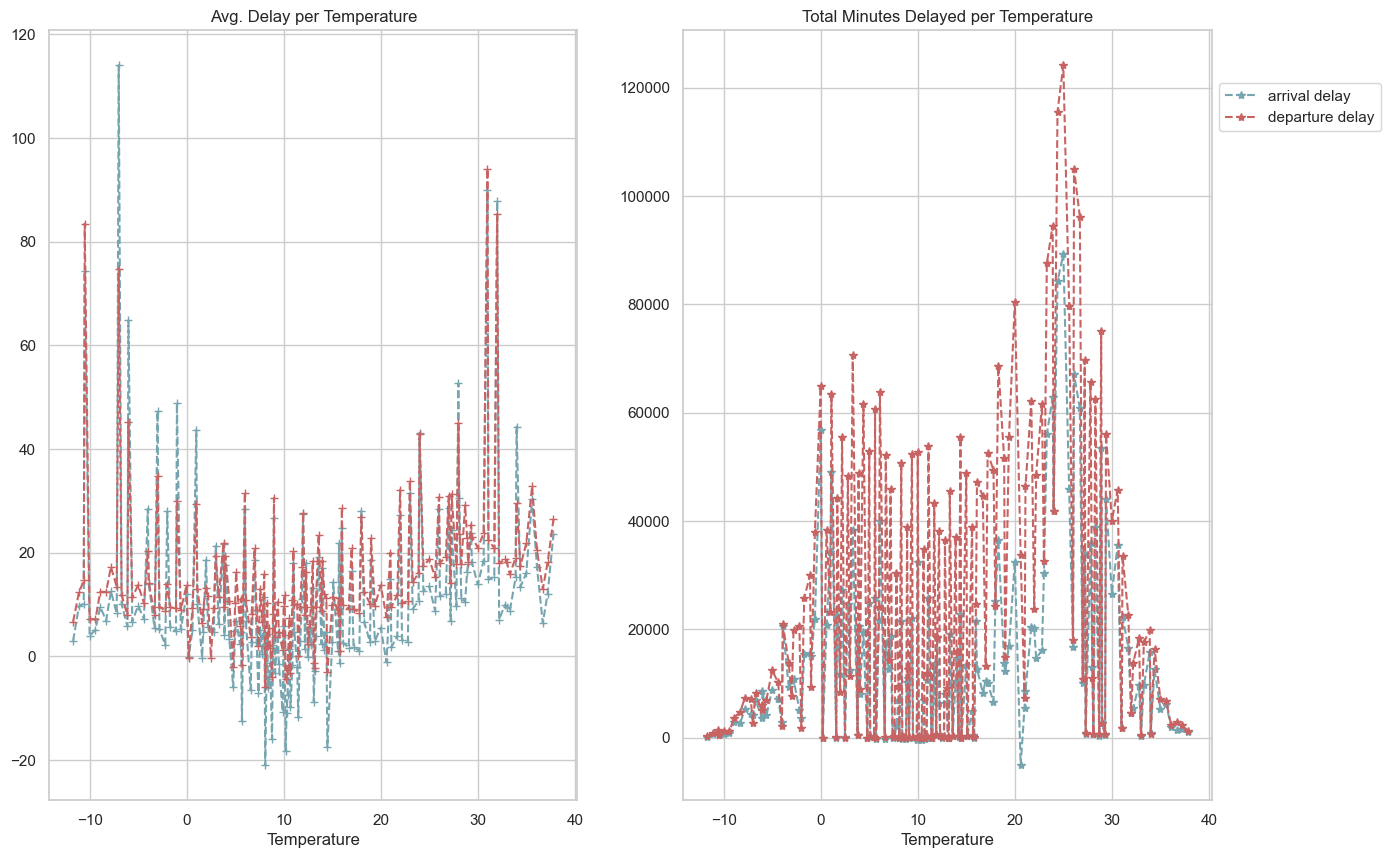

<Figure size 640x480 with 0 Axes>

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,10))
data[["temp","arr_delay","dep_delay"]].groupby(["temp"]).mean().plot(ax=ax[0],marker="+",linestyle="dashed",color=("#76a5af","#c86363"))
ax[0].set_title("Avg. Delay per Temperature")
ax[0].get_legend().remove()
ax[0].set_xlabel("Temperature")
data[["temp","arr_delay","dep_delay"]].groupby(["temp"]).sum().plot(ax=ax[1],marker="*",linestyle="dashed",color=("#76a5af","#c86363"))
ax[1].set_title("Total Minutes Delayed per Temperature")
ax[1].legend(["arrival delay","departure delay"], loc='center left', bbox_to_anchor=(1, 0.9))
ax[1].set_xlabel("Temperature")
plt.show()
plt.savefig(os.path.join(STORAGE_PATH, "temp_delay.pdf"))

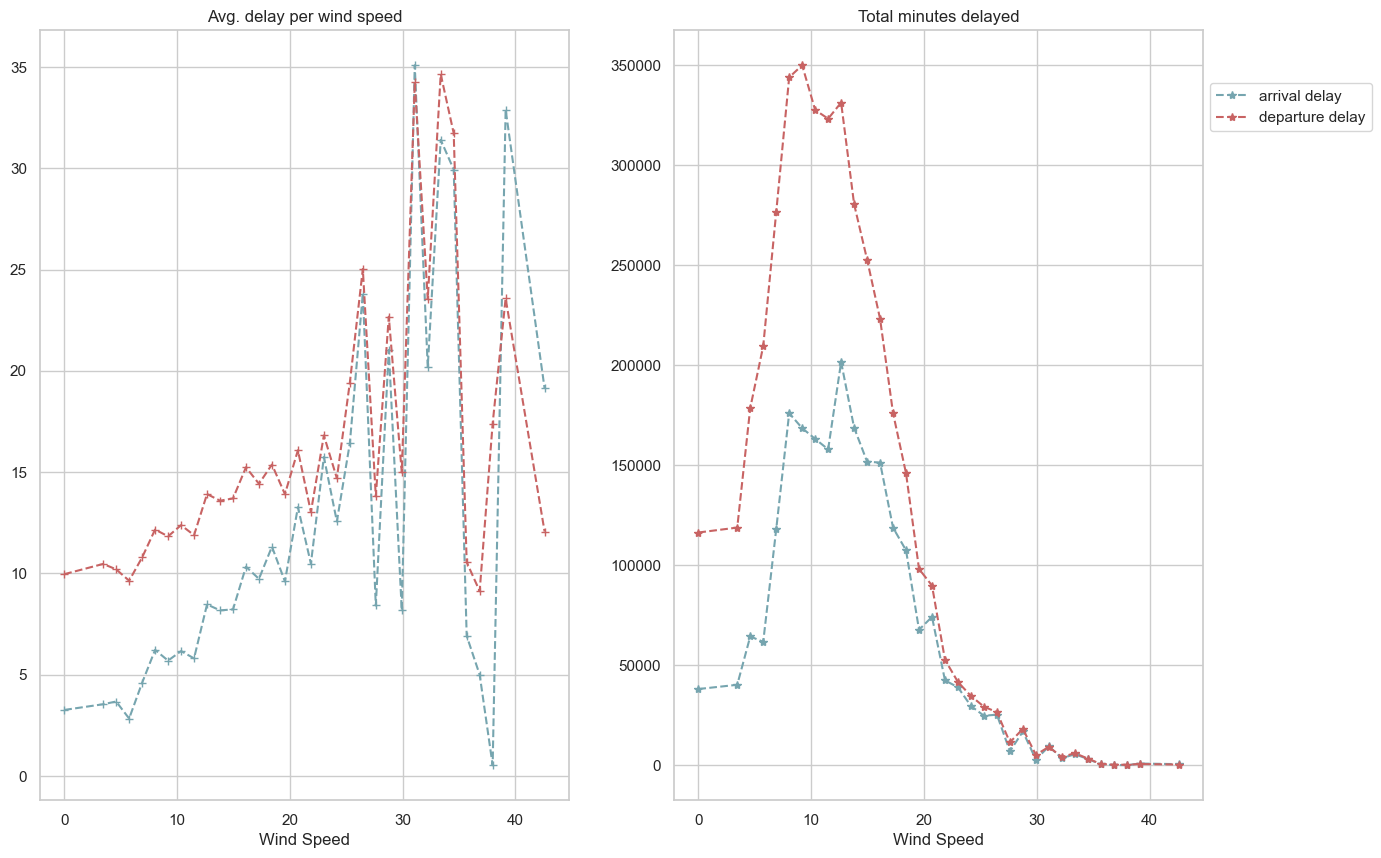

<Figure size 640x480 with 0 Axes>

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,10))
data[["wind_speed","arr_delay","dep_delay"]].groupby(["wind_speed"]).mean().plot(ax=ax[0],marker="+",linestyle="dashed",color=("#76a5af","#c86363"))
ax[0].set_title("Avg. delay per wind speed")
ax[0].get_legend().remove()
ax[0].set_xlabel("Wind Speed")
data[["wind_speed","arr_delay","dep_delay"]].groupby(["wind_speed"]).sum().plot(ax=ax[1],marker="*",linestyle="dashed",color=("#76a5af","#c86363"))
ax[1].set_title("Total minutes delayed")
ax[1].legend(["arrival delay","departure delay"], loc='center left', bbox_to_anchor=(1, 0.9))
ax[1].set_xlabel("Wind Speed")
plt.show()
plt.savefig(os.path.join(STORAGE_PATH, "ws_delay.pdf"))

Average departure delay per Temperature:


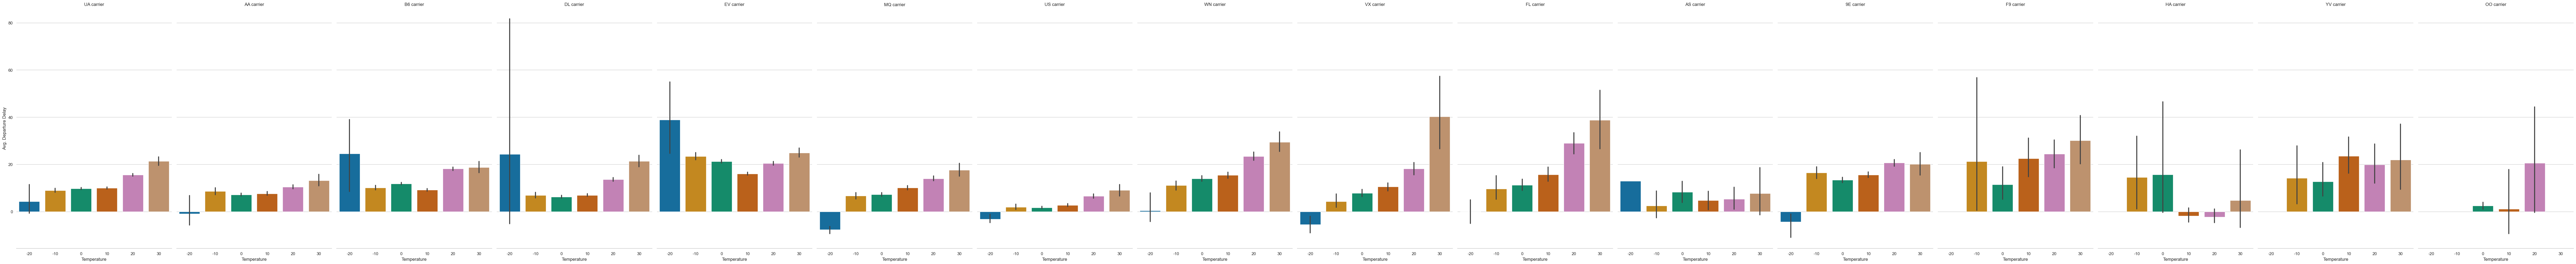

In [ ]:
print("Average departure delay per Temperature:")

ax = sns.catplot(
    data=data, x="temp_calc", y="dep_delay", col="carrier",
    kind="bar", height=10, aspect=.6, palette="colorblind"
)
ax.set_axis_labels("Temperature", "Avg. Departure Delay")
ax.set_xticklabels(["-20","-10","0","10","20","30"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)

plt.savefig(os.path.join(STORAGE_PATH, "al_temp_delay_d.pdf"))


Average arrival delay per Temperature:


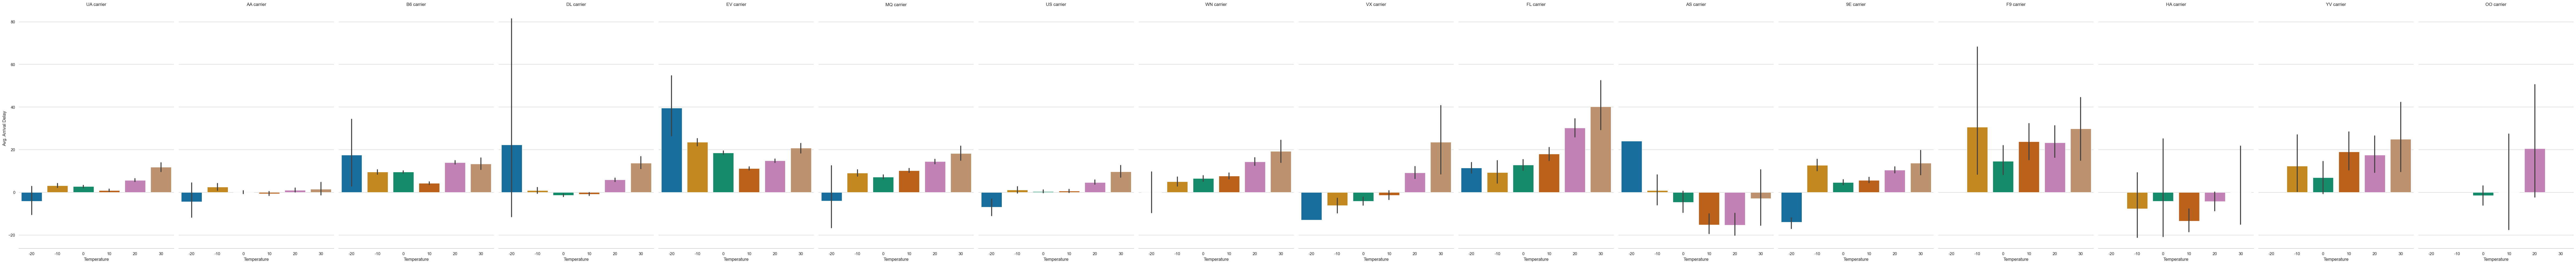

In [ ]:
print("Average arrival delay per Temperature:")

ax = sns.catplot(
    data=data, x="temp_calc", y="arr_delay", col="carrier",
    kind="bar", height=10, aspect=.6, palette="colorblind"
)
ax.set_axis_labels("Temperature", "Avg. Arrival Delay")
ax.set_xticklabels(["-20","-10","0","10","20","30"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)

plt.savefig(os.path.join(STORAGE_PATH, "al_temp_delay_a.pdf"))
